In [1]:
import dill
import gensim
import os
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns

from nltk.probability import FreqDist

from nltk.stem.porter import PorterStemmer

from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords

from gensim.models import FastText

from gensim.models import Word2Vec

import spacy

from gensim.models import Phrases

In [2]:
import collections

In [3]:
from networkx.exception import NetworkXError

In [4]:
from networkx.generators.ego import ego_graph

In [5]:
from chinese_whispers import chinese_whispers, aggregate_clusters

In [6]:
nlp = spacy.load("en_core_web_sm")

In [7]:
def process_text(text):
    my_doc = nlp(text)
    return [w.lemma_.lower() for w in my_doc if not w.is_stop and not w.is_punct and not w.is_digit and w.is_alpha]

In [8]:
model1 = Word2Vec.load("word2vec_model2")

C:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [9]:
model1.wv.most_similar('wine')

[('wines', 0.7426118850708008),
 ('wine_list', 0.7194114923477173),
 ('bottle', 0.664490282535553),
 ('pinot_noir', 0.6404286623001099),
 ('sommelier', 0.6329075694084167),
 ('chardonnay', 0.6259419322013855),
 ('merlot', 0.613429069519043),
 ('sauvignon_blanc', 0.6053673624992371),
 ('bottle_wine', 0.6018390655517578),
 ('prosecco', 0.5961366295814514)]

In [10]:
#read data
df = pd.read_csv (r'C:\Users\siddhartha\Desktop\Tag Extraction Automation\V1 - Work\dinein+Langid+i13set2.csv')

In [11]:
#filter only english data
is_df_en = df['review_langid']== 'en'
df = df[is_df_en]
df = df.head(1000)
#review text_en as DF
df = df[['review_text']]
df

review_text
1     Vacationing from America. Great Steaks!  Excel...
3     We came into Olive Garden for a late dinner af...
4     I was part of a group when we went to Aya this...
7     Be prepare for a long wait. Basement can house...
8     The crepes here are the best we had for our st...
9     Excellent choice of Lebanese food to eat and t...
10    From all the fantastic reviews I had viewed be...
11    I used to go to this pub years ago and it was ...
12    My friend &amp; I decided to come for a cockta...
13    Two friends and I visited for the Tale as old ...
14    I came here with my friends for a dinner and w...
17    good quality food though not exceptional. Very...
18    Big screen, good happy hours, good food, good ...
19    It is literally lobsters or burgers . Casual p...
20    Visited on a Saturday evening. My girlfriend h...
22    My wife and I treated our selves to a fantasti...
23    We got here with a large group of about 10 and...
24    If doing the same thing again and again expect...
25    The was manic busy, about 20 minute wait, we w...
27    Loved it. Great entertainment, and the meatloa...
28    Love the team. Everyone seems happy and cheerf...
29    Had a really enjoyable visit for brunch, food ...
30    Went along to the Cargo club on a Friday night...
33    There are two reviews set up for this restaura...
34    Came here about 6.30 on a Saturday. We were qu...
35    Mr. Chow has always been a safe call but recen...
36    Visited the place with my fiancé upon learning...
37    Love this place, you should go starving so you...
38    Set at the base of the Eiffel tower, you have ...
40    Really enjoyed the food-loved the venison puff...
...                                                 ...
1398  We ate here when staying on site, and the food...
1399  Excellent View from the rooftop level 43 , the...
1400  Amazing food!!!!! Service is top notch!! Didn'...
1401  THE WORST CUSTOMER SERVICE EVER AND MAJOR ATTI...
1402  We arrived in WDC from Denver yesterday evenin...
1403  Ellen's absolutely made our family trip to NY!...
1404  Good Indian food. Chicken and Paneer dishes we...
1405  I discover this place today and I tell you, it...
1406  We used Yelp to find an Italian restaurant nea...
1407  Probably my favorite meal!! Had the salmon and...
1408  Amazing cocktails excellent service  menu remi...
1412  I was taken here for a birthday meal experienc...
1413  Overlooking the waterway, and thought this wou...
1414  Went to M Resturant on Saturday as part of The...
1415  Restaurants in London, in my experience, are m...
1416  Went for lunch. The savoury tarts are deliciou...
1417  Wonderful fresh juices and great sandwiches wi...
1418  Loved the atmosphere, good music, good  drinks...
1420  Me and my family always visit chimichanga and ...
1421  I've eaten out a fair amount in and around Cap...
1423  Stunning view, outstanding service and outstan...
1424  Friendly staff, cosy atmosphere and good wine ...
1426  Came here for the second time for a family Sun...
1428  This wouldn't even be worth 1 star. Took a whi...
1429  After all the hype we looked forward to trying...
1430  We just popped into the Leicester Square Kitch...
1431  Incredible steaks for an excellent combined wi...
1437  There aren't many options for pure vegetarian ...
1442  Visited during Super Bowl Sunday with my daugh...
1443  had dinner with friends here.  The food was aw...

[1000 rows x 1 columns]

In [12]:
#unigram
df['ntext'] = df['review_text'].apply(process_text)
#bigram
bigram = Phrases(df['ntext'], min_count=5, threshold=2)
df['twograms'] = df['ntext'].apply(lambda x : bigram[x])
#trigram
trigram = Phrases(bigram[df['ntext']], min_count=5, threshold=2)
df['threegrams'] = df['twograms'].apply(lambda x : trigram[x])

df.head(10)

review_text  \
1   Vacationing from America. Great Steaks!  Excel...   
3   We came into Olive Garden for a late dinner af...   
4   I was part of a group when we went to Aya this...   
7   Be prepare for a long wait. Basement can house...   
8   The crepes here are the best we had for our st...   
9   Excellent choice of Lebanese food to eat and t...   
10  From all the fantastic reviews I had viewed be...   
11  I used to go to this pub years ago and it was ...   
12  My friend &amp; I decided to come for a cockta...   
13  Two friends and I visited for the Tale as old ...   

                                                ntext  \
1   [vacation, america, great, steaks, excellent, ...   
3   [come, olive, garden, late, dinner, day, unive...   
4   [group, go, aya, month, birthday, party, famil...   
7   [prepare, long, wait, basement, house, person,...   
8   [crepe, good, stay, paris, generous, serving, ...   
9   [excellent, choice, lebanese, food, eat, away,...   
10  [fantastic, review, view, take, look, expectat...   
11  [pub, year, ago, need, tlc, pleasure, handsome...   
12  [friend, amp, decide, come, cocktail, hour, la...   
13  [friend, visit, tale, old, time, afternoon, te...   

                                             twograms  \
1   [vacation, america, great, steaks, excellent, ...   
3   [come, olive, garden, late, dinner, day, unive...   
4   [group, go, aya, month, birthday, party, famil...   
7   [prepare, long_wait, basement, house, person, ...   
8   [crepe, good, stay, paris, generous, serving, ...   
9   [excellent, choice, lebanese, food, eat, away,...   
10  [fantastic, review, view, take, look, expectat...   
11  [pub, year_ago, need, tlc, pleasure, handsomel...   
12  [friend, amp, decide, come, cocktail, hour, la...   
13  [friend, visit, tale, old, time, afternoon_tea...   

                                           threegrams  
1   [vacation, america, great, steaks, excellent, ...  
3   [come, olive, garden, late, dinner, day, unive...  
4   [group, go, aya, month, birthday, party, famil...  
7   [prepare, long_wait, basement, house, person, ...  
8   [crepe, good, stay, paris, generous, serving, ...  
9   [excellent, choice, lebanese, food, eat, away,...  
10  [fantastic, review, view, take, look, expectat...  
11  [pub, year_ago, need, tlc, pleasure, handsomel...  
12  [friend, amp, decide, come, cocktail, hour, la...  
13  [friend, visit, tale, old, time, afternoon_tea...

In [13]:
corpus = [w for row in df['threegrams'].tolist() for w in row]

In [14]:
corpus[:3]

['vacation', 'america', 'great']

In [15]:
fdist = FreqDist(corpus)

In [16]:
fdist.most_common(25)

[('good', 424),
 ('food', 402),
 ('restaurant', 384),
 ('place', 300),
 ('time', 266),
 ('great', 261),
 ('service', 211),
 ('staff', 209),
 ('go', 201),
 ('order', 183),
 ('come', 176),
 ('eat', 174),
 ('menu', 174),
 ('table', 168),
 ('visit', 158),
 ('nice', 156),
 ('like', 155),
 ('meal', 148),
 ('delicious', 141),
 ('try', 141),
 ('dish', 138),
 ('dinner', 128),
 ('excellent', 126),
 ('friend', 125),
 ('drink', 125)]

In [17]:
stops = stopwords.words("english")

In [18]:
wlist = []
for item, f in fdist.items():
    if item.lower() not in stops:
        wlist.append({"word":item, "count":f})

In [19]:
words_df = pd.DataFrame(wlist)

In [20]:
words_df.sort_values(by="count", ascending=False, inplace=True)

In [21]:
words_df.head(n=10)

count        word
86     424        good
27     402        food
114    384  restaurant
81     300       place
77     266        time
2      261       great
441    211     service
8      209       staff
32     201          go
64     183       order

In [22]:
def get_similarity(w):
    similar = []
    try:
        similar = model1.wv.most_similar(w)
    except KeyError:
        print(w)
    return similar

In [23]:
words_df['similar_words'] = words_df['word'].apply(get_similarity)

great_food
food_great
food_service
great_place
good_service
cooked
good_food
good_place
service_great
food_come
welcoming
excellent_food
delicious_food
visit_place
enjoy_food
visit_restaurant
food_amazing
satisfied
great_staff
food_drink
great_meal
good_steak
service_staff
smoked
thank_great
food_excellent_service
earlier
great_thing
shopping
varied
definitely_worth_visit
view_amazing
longer
dining_area
prepared
wine_choice
enjoy_lunch
cocktail_menu
amazing_experience
fine_dining
probably_good
atmosphere_lovely
eun
clos
muk
ji
understanding
jerusalem
aya
geoduck
calorie
sharing
excited
singing
covent
maitre
smoking
sized
maggiore
confused
mignon
corned
relaxing
gavroche
sophisticated
wedding
fogo
leicester
breathtake
beginning
fashioned
stove
mouthwatere
doggy
willing
dressed
fulvio
eaten
lahori
iced
tuesdays
cooking
liking
ordering
tired
pollen
britney
studios
fed
uncooke
springs
presented
waiting
delighted
memorabilia
hungarian
delious
seasoned
faye
amusingly
fashionista
quack
kite
e

In [24]:
words_df.head()

count        word                                      similar_words
86     424        good  [(decent, 0.7283838391304016), (pretty_good, 0...
27     402        food  [(food_good, 0.6906038522720337), (the_food, 0...
114    384  restaurant  [(venue, 0.6343358159065247), (this_restaurant...
81     300       place  [(this_place, 0.6448608636856079), (place_eat,...
77     266        time  [(wait_long, 0.5594205260276794), (feel_hurry,...

In [25]:
similarlist = list(zip(words_df['word'], words_df['similar_words']))

In [26]:
for t1, t2 in similarlist:
    for w in t2:
        print(t1, w[0], w[1])

good decent 0.7283838391304016
good pretty_good 0.70391845703125
good very_good 0.6811639070510864
good great 0.675407886505127
good nice 0.6565622091293335
good good_quality 0.6539968252182007
good really_good 0.6409575343132019
good excellent 0.624347984790802
good awesome 0.6144660711288452
good very_nice 0.6071488857269287
food food_good 0.6906038522720337
food the_food 0.663020133972168
food quality_food 0.6105746030807495
food food_fantastic 0.5938518047332764
food food_tasty 0.5876824855804443
food food_delicious 0.5752954483032227
food food_excellent 0.5727249383926392
food food_amaze 0.5585579872131348
food food_superb 0.5295506715774536
food food_okay 0.519023597240448
restaurant venue 0.6343358159065247
restaurant this_restaurant 0.6122469902038574
restaurant eatery 0.6055630445480347
restaurant establishment 0.5928317904472351
restaurant resturant 0.5830289721488953
restaurant place 0.5773894190788269
restaurant italian_restaurant 0.5723479390144348
restaurant location 0.56

chicken lamb 0.8301207423210144
chicken beef 0.8252553939819336
chicken fry_rice 0.819733202457428
chicken mix_grill 0.8138731718063354
chicken lamb_chop 0.7966854572296143
chicken potato 0.7879596948623657
chicken little_spin-dry 0.7875115871429443
chicken prawn 0.7856706976890564
chicken duck 0.7843484282493591
find discover 0.601520299911499
find found 0.5598275661468506
find pay_lot 0.5411292314529419
find find_place 0.532910943031311
find search 0.5066076517105103
find discern 0.5065124034881592
find italian_restaurant 0.4869663715362549
find tourist_trap 0.4750567376613617
find locate 0.47465914487838745
find near_hotel 0.4723421037197113
cocktail drink 0.6910054683685303
cocktail cocktails 0.6904076337814331
cocktail happy_hour 0.6609174013137817
cocktail martini 0.6283869743347168
cocktail champagne 0.6016349792480469
cocktail fab_cocktail 0.5943573713302612
cocktail drinks 0.5557822585105896
cocktail night_cap 0.5550808310508728
cocktail cocktail_bar 0.5482919216156006
cocktai

minute min 0.8105403780937195
book book_table 0.840656042098999
book book_month 0.7573762536048889
book book_week 0.7563331127166748
quickly 0.6148116588592529
quick friendly_quick 0.6145211458206177
big large 0.7855521440505981
big huge 0.7557445764541626
big small 0.7273908853530884
big massive 0.6601521968841553
big size 0.641090989112854
big tiny 0.5997241735458374
big bite_small 0.5896667242050171
big big_space 0.5802088975906372
big humongous 0.5724499225616455
big smallish 0.5707837343215942
fish salmon 0.8021383285522461
fish tuna 0.7961726784706116
fish crab 0.7961481213569641
fish prawn 0.7810745239257812
fish lobster 0.7803524732589722
fish shrimp 0.7795346975326538
fish seafood 0.7648178935050964
fish duck 0.7629640102386475
fish scallop 0.7580505609512329
fish halibut 0.7407838702201843
cook sauce 0.6511090397834778
cook prepare 0.6311120390892029
cook ingredient 0.6080610752105713
cook hot_plate 0.6063899993896484
cook hot_stone 0.6031637191772461
cook cheap_cut 0.6028565

fry pull_pork 0.7819653153419495
fry bacon 0.7781683206558228
fry hand_cut 0.7657517194747925
fry burger_fry 0.7568755149841309
fry burger 0.7550235390663147
fry chicken_burger 0.7532562017440796
live visit_disney 0.6735562682151794
live live_london 0.6660484075546265
live visit_ny 0.6653944849967957
live have_live 0.663824200630188
live favorite_restaurant 0.6468273401260376
live try_new 0.6423453092575073
live visit_nyc 0.6389915943145752
live favourite_place 0.6370807886123657
live last_day 0.6352803707122803
live trip_ny 0.6338614821434021
standard quality 0.7104450464248657
standard price_high 0.7036060690879822
standard average 0.6799252033233643
standard price_pay 0.6639686822891235
standard basic 0.658474862575531
standard maintain_high 0.6497746706008911
standard reasonable_value 0.6466488838195801
standard high_price 0.6443910598754883
standard high_standard 0.6395646333694458
standard extremely_high 0.6395511627197266
ok okay 0.8406707048416138
ok pretty_good 0.7571295499801

water refill 0.6928861141204834
water ice_water 0.6917327046394348
water refill_water 0.6883057355880737
water take_minute 0.6850305199623108
water order_bottle 0.6850287914276123
water tap_water 0.684985339641571
water small_bottle 0.6770040988922119
sandwich order_pastrami 0.764876127243042
sandwich fish_finger 0.7491763830184937
sandwich meat_sandwich 0.7297066450119019
sandwich corn_beef 0.7251739501953125
sandwich muffin 0.7097426652908325
sandwich hot_dog 0.7080016136169434
sandwich hamburger 0.7045949101448059
sandwich burger_fry 0.7029017210006714
sandwich cheeseburger 0.6981837153434753
sandwich ham_cheese 0.6931445598602295
wrong bad 0.7995194792747498
wrong terrible 0.7631821036338806
wrong complain 0.7433546185493469
wrong awful 0.7236958742141724
wrong horrible 0.7186063528060913
wrong poor 0.7151133418083191
wrong feel_compel 0.713821291923523
wrong give_wrong 0.7026663422584534
wrong bad_service 0.6919691562652588
wrong get_wrong 0.6918290257453918
half take_minute 0.756

red white_wine 0.7564162015914917
red brown 0.7385103106498718
red shoot_glass 0.7380846738815308
red all_wash 0.7380374670028687
red green 0.734268844127655
red blue 0.7306673526763916
base thin_crispy 0.622016191482544
base base_pizza 0.6217507123947144
base add_salt 0.6169998645782471
base food_consistent 0.6143302321434021
base -PRON-_usually 0.6067885160446167
base similar 0.6062464714050293
base offer_gluten_free 0.6042560935020447
base low_quality 0.6010470390319824
base menu_limit 0.5992583632469177
base speciality 0.5957300662994385
finally minute_late 0.8354153037071228
finally min_late
yes maybe 0.7206212282180786
yes anyway 0.6961668729782104
yes hey 0.6810964941978455
yes not_sure 0.6780134439468384
yes -PRON-_guess 0.6776599884033203
yes little_bite 0.6742498874664307
yes -PRON-_know 0.6625372171401978
yes -PRON-_think 0.6608631610870361
yes but 0.6592744588851929
yes probably 0.656571090221405
meet large_group 0.6379715204238892
meet have_book 0.6372949481010437
meet att

toilet grind_floor 0.6549358367919922
toilet dine_area 0.6541852355003357
toilet make_wonder 0.6541061997413635
wait_minute wait_min 0.9486915469169617
wait_minute wait_hour 0.9126152992248535
wait_minute take_minute 0.9089804887771606
wait_minute wait_long 0.9086154103279114
wait_minute order_drink 0.8987261056900024
wait_minute wait_time 0.8964451551437378
wait_minute minute_wait 0.8943448066711426
wait_minute half_hour 0.8885816335678101
wait_minute long_wait 0.8876185417175293
wait_minute order_take 0.8814454078674316chinese thai 0.6635434627532959
chinese korean 0.6634536981582642
chinese mexican 0.6521610021591187
chinese british 0.6488313674926758
write read 0.8188140392303467
write realise 0.7251161932945251
write feel_compel 0.7203460335731506
write speak_manager 0.7199885845184326
write -PRON-_understand 0.7185251712799072
write walk_away 0.7076016664505005
write write_bad 0.7047245502471924
write not_sure 0.6976235508918762
write enquire 0.6974345445632935
write spend_minute

type large_variety 0.6641147136688232
type indian_chinese 0.6545431613922119
type do_expect 0.6500922441482544
type low_quality 0.6477630734443665
honestly entire_life 0.7136967182159424
honestly never 0.6965842247009277
honestly u_not 0.6877354383468628
honestly -PRON-_honestly 0.6873518228530884
honestly food_poison 0.6837573647499084
honestly frankly 0.6794900894165039
honestly not_disappoint 0.6774033308029175
honestly in_short 0.6772476434707642
honestly let_start 0.6752066016197205
honestly eat_life 0.6745489239692688
greek east_london 0.507855236530304
greek in_heart 0.506725013256073
greek inamo 0.5001527070999146
greek city_center 0.49982166290283203
greek south_american 0.4980859160423279
greek sicilian 0.49795281887054443
greek london_far 0.49640366435050964
greek worth_drive 0.4957578182220459
greek turkish 0.49513155221939087
greek place_dubai 0.4950782358646393
dark high_ceiling 0.7603467702865601
dark depend_sit 0.7504228353500366
dark low_light 0.7435543537139893
dark l

will_disappoint plan_visit 0.8576812744140625
will_disappoint near_future 0.8549321889877319
will_disappoint cheap_worth 0.8508680462837219
will_disappoint visit_orlando 0.8459933996200562
will_disappoint will_regret 0.8449665307998657
will_disappoint next_time 0.8439000844955444
will_disappoint time_year 0.842734694480896
will_disappoint visit_paris 0.8412347435951233
fit relatively_small 0.6606193780899048
fit seat_comfortable 0.6503791809082031
fit in_conclusion 0.6446146965026855
fit huge_disappointment 0.641211748123169
fit table_space 0.6400920152664185
fit bite_pretentious 0.6338751316070557
fit good_sign 0.6310053467750549
fit little_cramp 0.6278976798057556
fit lack_atmosphere 0.6249860525131226
fit particularly_busy 0.621302604675293
season foie_gra 0.7992621064186096
season cook_perfectly 0.794538140296936
season slow_cook 0.792060136795044
season soft_shell_crab 0.7842015624046326
season fry_rice 0.7834324836730957
season perfectly_cook 0.7812087535858154
season mash_potato

exquisite sumptuous 0.774491548538208
exquisite superb 0.7564895749092102
exquisite magnificent 0.7508305311203003
exquisite delightful 0.7383735179901123
exquisite present_beautifully 0.7363002300262451
exquisite splendid 0.7346442937850952
exquisite gorgeous 0.726786732673645
exquisite incredible 0.7206430435180664
exquisite truly_excellent 0.7179450988769531
cozy cosy 0.8127681612968445
cozy the_decor 0.7333210110664368
cozy beautifully_decorate 0.7322177886962891
cozy intimate 0.7276757955551147
cozy comfortable 0.7201714515686035
cozy the_ambiance 0.7101585268974304
cozy the_interior 0.705422043800354
cozy classy 0.7051474452018738
cozy small_cosy 0.7049452066421509
cozy cool_relax 0.7022297978401184
chill hangout_friend 0.7449406385421753
chill cool 0.7001397609710693
chill nice_music 0.69498211145401
chill cool_music 0.6656909584999084
chill live_band 0.6585321426391602
chill sit_outside 0.655507504940033
chill relax 0.6542997360229492
chill nice_place 0.6534566879272461
chill g

bag sit_minute 0.6630143523216248
bag tray 0.6606382727622986
bag when_eventually 0.6568471789360046
bag glass_water 0.655964195728302
bag completely_cold 0.6540337800979614
bag tell_waiter 0.6534446477890015
bag cream_soda 0.6525532007217407
bag bring_bill 0.6524428129196167
bag take_away 0.6510318517684937
bag tap_water 0.6498950719833374
apart only_problem 0.6159650683403015
apart service_poor 0.6128997802734375
apart say_word 0.6074728965759277
apart too_bad 0.6066588759422302
apart service_slow 0.6030852794647217
apart love_idea 0.6015516519546509
apart slow_service 0.6003680229187012
apart only 0.6002762317657471
apart spoil_experience 0.5989712476730347
apart -PRON-_understand 0.5969276428222656
brown black 0.806105375289917
brown white 0.7939591407775879
brown blue 0.7671914100646973
brown pink 0.7608029842376709
brown green 0.7455539703369141
brown red 0.7385103106498718
brown small_slice 0.7321333885192871
brown orange 0.72922283411026
brown yellow 0.7265521883964539
brown am

center marine_drive 0.7018338441848755
center restaurant_situate 0.7015923857688904
center outdoor_sit 0.7009470462799072
overly excessively 0.714154064655304
overly too 0.7085358500480652
overly incredibly 0.6953052282333374
overly terribly 0.6728224754333496
overly young_couple 0.6614251732826233
overly tad 0.6604353189468384
overly pleasant_decor 0.654427170753479
overly staff_genuinely 0.6508605480194092
overly equally 0.6483705043792725
overly -PRON-_gripe 0.6444546580314636
company business 0.6981824636459351
company mahiki 0.6977620124816895
company five_fields 0.6899732351303101
company lunch_break 0.6822025775909424
company general_manager 0.6697904467582703
company absolutely_shock 0.6691111326217651
company run_smoothly 0.667816162109375
company crowd_noisy 0.6661581993103027
company hard_rock 0.6564947366714478
company tgi 0.6561051607131958
wood wooden 0.7521437406539917
wood dark_wood 0.727669358253479
wood furniture 0.7021195888519287
wood light_airy 0.6908026933670044
w

thoroughly_recommend if_fan 0.8638559579849243
hold finally_get 0.7381293773651123
hold free_table 0.7368831038475037
hold finally_seat 0.7363508939743042
hold wait_outside 0.7321817874908447
hold walk_away 0.7212039232254028
hold wait_line 0.720707893371582
hold get_seat 0.7198300957679749
hold cram_table 0.7175987958908081
hold arrive_minute 0.7119779586791992
hold there_line 0.7104696035385132
feeling felt 0.7426074743270874
feeling feel 0.6510311961174011
feeling mood 0.6066895723342896
feeling sense 0.5590479373931885
feeling young_adult 0.5543525218963623
feeling impression 0.5393061637878418
feeling something 0.5385589599609375
feeling feel_little 0.5378196239471436
feeling only_thing 0.5323386192321777
feeling dream_come 0.5263250470161438
celebrate_birthday birthday_celebration 0.9143897294998169
celebrate_birthday birthday_dinner 0.8915689587593079
celebrate_birthday aqua_shard 0.8672844767570496
celebrate_birthday take_wife 0.8651297092437744
celebrate_birthday treat_friend 

omelette egg_benedict 0.7632431983947754
omelette smoke_salmon 0.7498694062232971
omelette poach_egg 0.7402596473693848
omelette omlette 0.7259523272514343
omelette quiche 0.7187888622283936
omelette home_fry 0.7155721783638
omelette option_menu 0.7083882093429565
omelette foie_gra 0.7067010402679443
omelette green_bean 0.706393837928772
meeting conference 0.6340943574905396
meeting forum 0.6012863516807556
meeting meet 0.587419867515564
meeting birthday_lunch 0.5804760456085205
meeting met 0.5772204399108887
meeting luncheon 0.5769063830375671
meeting discuss 0.5733205080032349
meeting session 0.5697239637374878
meeting family_dinner 0.5668831467628479
meeting early_dinner 0.5648202896118164
mood feeling 0.6066895723342896
mood fab_night 0.590822160243988
mood bar_stock 0.5830119848251343
mood crowd_noisy 0.5794159770011902
mood but_overall 0.5757931470870972
mood people_meet 0.5729110240936279
mood singe_waiter 0.5719397068023682
mood quickly_possible 0.5718798637390137
mood casual_a

tough salad_dress 0.6608928442001343
tough eat_half 0.6590789556503296
tough pretty_big 0.6574733257293701
lebanese moroccan 0.7183717489242554
lebanese turkish 0.6708574295043945
lebanese vietnamese 0.6605031490325928
lebanese bombay 0.6477447748184204
lebanese serve_authentic 0.6473422050476074
lebanese chinese_japanese 0.6464164853096008
lebanese price_relatively 0.6418735384941101
lebanese filter_coffee 0.6416165828704834
online bad_review 0.7104254961013794
online week_advance 0.7096677422523499
online tripadvisor 0.7091629505157471
flow low_level 0.5969387292861938
flow only_problem 0.57877117395401
flow live_piano 0.5777791738510132
flow din_room 0.5763267278671265
flow light_bright 0.5746469497680664
flow amaze_array 0.565231204032898
flow say_word 0.5651911497116089
flow dine_space 0.5650597810745239
flow comfortable_seat 0.5631128549575806
flow aspect_restaurant 0.5630741119384766
milk dairy 0.7628284692764282
milk orange_juice 0.7308785915374756
milk pot_tea 0.71526485681533

cope adapt 0.6375056505203247
cope ease 0.6132125854492188
cope offer_suggestion 0.5945755243301392
cope manage 0.5915913581848145
cope spoil_even 0.5871407985687256
cope pay_attention 0.5811948776245117
cope table_numb 0.5793183445930481
cope respond 0.5720582604408264
cope adjust 0.5675504207611084
mexican mexico 0.6743992567062378
mexican chinese 0.6521610021591187
mexican american 0.6482652425765991
mexican spanish 0.6435487270355225
mexican peruvian 0.642886221408844
mexican mexican_food 0.6236134767532349
mexican indian 0.6221151351928711
mexican tex_mex 0.6220737099647522
mexican bombil_fry 0.6201943159103394
mexican usa 0.6159262657165527
joy happiness 0.695823609828949
joy excitement 0.6945182085037231
joy joyful 0.6892544627189636
joy pleasure 0.6825771331787109
joy unforgettable_experience 0.6682698726654053
joy like_home 0.6621784567832947
joy set_tone 0.6586233377456665
joy thrill 0.6534693241119385
joy experience_memorable 0.6523924469947815
joy passion 0.6459429264068604

pink black 0.747098445892334
pink purple 0.7462345957756042
pink cheesecake_delicious 0.746160089969635
mussel scallop 0.8065440654754639
mussel prawn 0.800952672958374
mussel sea_bass 0.7874408960342407
mussel crab 0.7873266935348511
mussel salmon 0.7836276888847351
mussel shrimp 0.7832844257354736
mussel tuna 0.7732250690460205
mussel for_main 0.7724061012268066
mussel garlic_mash 0.7714800834655762
mussel foie_gra 0.7660456895828247
organic huge_variety 0.6745951771736145
organic simple_tasty 0.6635226011276245
organic healthy_choice 0.643441379070282
organic different_type 0.6432610750198364
organic healthy_fresh 0.6426817178726196
organic gourmet 0.6420430541038513
organic different_variety 0.6389153003692627
organic excellently_present 0.637660801410675
organic fresh_fruit 0.6360338926315308
organic fill_plate 0.6349241733551025
american british 0.7077012658119202
american european 0.6957247257232666
american indian 0.6684697866439819
american chinese 0.6656349897384644
american 

tikka paneer 0.7687638401985168
tikka tandoori 0.7674002647399902
tikka tikka_masala 0.7658730745315552
tikka rasam 0.7633038759231567
courtyard terrace 0.7616641521453857
courtyard patio 0.7534676790237427
courtyard garden 0.7262068390846252
courtyard dine_room 0.7238644957542419
courtyard lounge_area 0.7006394863128662
courtyard foyer 0.697908341884613
courtyard dine_area 0.6913572549819946
courtyard roof_terrace 0.6873425841331482
courtyard sit_outside 0.6841952800750732
courtyard outside_terrace 0.6828383207321167
hubby missus 0.7696600556373596
hubby beau 0.7453082203865051
hubby boyfriend 0.7446002960205078
hubby fiancé 0.7270281314849854
hubby dad 0.7260898947715759
hubby fiance 0.7141762971878052
hubby pal 0.6999541521072388
hubby old_daughter 0.6985555291175842
hubby yr_old 0.6854583621025085
hubby husband_love 0.6835489273071289
margherita caprese 0.7622687816619873
margherita margherita_pizza 0.762031614780426
margherita tomato_mozzarella 0.7607440948486328
margherita salad_

et de_la 0.6870925426483154
et de 0.6826289296150208
et du 0.6733037233352661
et la 0.6687039136886597
juicy meaty 0.8318349123001099
juicy bake_potato 0.8113254308700562
juicy triple_cook 0.8075631856918335
juicy onion_ring 0.8052151203155518
juicy mash_potato 0.8035774230957031cheeseburger hamburger 0.8093847632408142
cheeseburger hot_dog 0.7754735946655273
cheeseburger cheese_burger 0.7710057497024536
cheeseburger chicken_sandwich 0.7685944437980652
cheeseburger beef_burger 0.764872670173645
cheeseburger burger_fry 0.7641113996505737
cheeseburger fries 0.7638497352600098
cheeseburger burger_lobster 0.7636208534240723
cheeseburger veggie_burger 0.7625677585601807
cheeseburger burger_chip 0.762061357498169
uni med 0.5188111066818237
uni battersea 0.5107117891311646
uni golden_chippy 0.5077511668205261
uni be_vegetarian 0.5073622465133667
uni bayswater 0.5072886347770691
uni review_online 0.506365180015564
uni dempsey 0.5061483383178711
uni worth_drive 0.5054567456245422
uni city_cente

takeaway stay_london 0.6061713695526123
takeaway pizza_express 0.6059845685958862
takeaway blackheath 0.6051642894744873
takeaway need_quick 0.6017898321151733
takeaway high_hope 0.5980696678161621
takeaway angus_steakhouse 0.5944849848747253
takeaway pizza_hut 0.5934997200965881
takeaway lebanese_restaurant 0.5929504632949829
pocket wallet 0.6592388153076172
pocket bag 0.5915632247924805
pocket main_side 0.5839216113090515
pocket away_box 0.582377552986145
pocket extra_charge 0.5821154713630676
pocket get_ticket 0.5757286548614502
pocket time_round 0.5750651359558105
pocket admit_-PRON- 0.5715279579162598
pocket no_offer 0.5714480876922607
pocket in_end 0.5709609985351562
gate entrance 0.6114237904548645
gate about_minute 0.5517209768295288
gate door 0.5477936863899231
gate ask_seat 0.5399835109710693
gate within_minute 0.5369873642921448
gate minute_early 0.533733069896698
gate hour_wait 0.5334948897361755
gate fairly_busy 0.5333935618400574
gate tell_wait 0.5328851938247681
gate arr

jan february 0.5744755864143372
jan july 0.5678070187568665
jan malaysian 0.562787652015686
jan nepal 0.5584696531295776
jan rahul 0.5558149218559265
jan holland 0.5545738339424133
jan ramesh 0.5535187125205994
sofa furniture 0.6632077693939209
sofa chair 0.6481378674507141
sofa patio 0.6390419006347656
sofa banquette 0.6315262913703918
sofa fireplace 0.6218148469924927
sofa pillow 0.6198447346687317
sofa seat_area 0.6163368225097656
sofa dine_area 0.6160800457000732
sofa lounge_area 0.6152838468551636
sofa dim_light 0.6136811971664429
air stone_throw 0.6497535109519958
air light_bright 0.6430281400680542
air seat_floor 0.6370853185653687
air low_level 0.6356103420257568
air rainy_day 0.6346122622489929
air people_stand 0.6341594457626343
air lack_space 0.6278775930404663
air seat_inside 0.6276105642318726
air finger_bowl 0.6273906230926514
air colour 0.6267288327217102
lightly red_chilli 0.6554726362228394
lightly school_dinner 0.6517151594161987
lightly tomato_base 0.6458632946014404

cry moan 0.5421165227890015
cry shout 0.5369579195976257
cry chiltern_firehouse 0.535322904586792
sensational spectacular 0.7342205047607422
sensational stunning 0.7282637357711792
sensational splendid 0.7174859046936035
sensational creative_delicious 0.7015002369880676
sensational absolutely_stun 0.6998130083084106
sensational magnificent 0.6987762451171875
sensational simply_amaze 0.696670413017273
sensational truly_excellent 0.6935549378395081
sensational truly_amaze 0.6931040287017822
sensational could_fault 0.6849603652954102
ex boss 0.5009433031082153
ex ask_speak 0.4804196357727051
ex ask_ok 0.4693690538406372
ex fellow 0.4638906717300415
ex qbara 0.4635978639125824
ex absolutely_appall 0.46337786316871643

supreme king 0.5218148827552795
supreme if_crave 0.5169101357460022
supreme ultimate 0.5113221406936646
supreme absolute 0.5060553550720215
supreme agree_well 0.5041523575782776
supreme reasonable_cost 0.49935412406921387
supreme extremely_satisfy 0.49260857701301575
supreme 

coconut mango 0.8559194803237915
coconut fresh_fruit 0.8276085257530212
coconut pineapple 0.8129150867462158
coconut ice_cream_chocolate 0.8118804693222046
coconut brown_onion 0.803279459476471
coconut ginger 0.8026540279388428
coconut sweet_spicy 0.799393892288208
coconut green_tea 0.7958882451057434
coconut spring_roll 0.7957309484481812
coconut salt_caramel 0.7943206429481506
cote coq 0.6356447339057922
cote cote_de 0.6228043437004089
cote le 0.6207060813903809
cote market_grill 0.6071522831916809
cote monsieur 0.6071473360061646
cote la 0.60060054063797
cote andheri 0.5947467088699341
cote cambridge 0.5931901931762695
cote paulo 0.5928858518600464
cote stay_paris 0.5898610949516296
scallion chive 0.7522677779197693
scallion garlic 0.7391135692596436
scallion for_entree 0.7372305393218994
scallion fry_rice 0.7337075471878052
scallion tender_delicious 0.732775866985321
scallion for_dessert 0.7269964814186096
scallion black_pepper 0.7268151044845581
scallion black_bean 0.7250015735626

hake turbot 0.7303638458251953
hake prawn 0.7281430959701538
hake scallop 0.7224234938621521
hake mackerel 0.7200688123703003
hake haddock 0.7156317234039307
tandoor chaat 0.6788271069526672
tandoor paneer 0.6761572957038879
tandoor biryani 0.6672570705413818
tandoor dum_biryani 0.663255512714386
tandoor tandoori 0.6588175892829895
tandoor tawa 0.6539516448974609
tandoor paneer_tikka 0.6537452340126038
tandoor roti 0.6519572734832764
tandoor butter_naan 0.6473404765129089
tandoor pav_bhaji 0.6443854570388794
lite ish 0.5564370155334473
lite american_diner 0.496529757976532
lite good_range 0.48630449175834656
lite version 0.4846569299697876
lite sweet_savoury 0.48173266649246216
lite little_odd 0.4792768359184265
lite typical_american 0.4770713150501251
lite er 0.47445863485336304
lite mini_burger 0.4716103672981262
lite bite_limit 0.47041767835617065
sake glass_home 0.6028836369514465
sake give_chance 0.5899293422698975
sake really_glad 0.5781735181808472
sake exceptional_value 0.57499

refurbish construct 0.6010552048683167
refurbish demolish 0.599266767501831
refurbish upgrade 0.5707453489303589
refurbish refit 0.5641396641731262
refurbish spruce 0.5609111785888672
gravy mash_potato 0.8448933362960815
gravy cook_perfectly 0.8430123329162598
gravy roast_potato 0.8273512125015259
gravy foie_gra 0.822063148021698
gravy green_bean 0.8206464052200317
gravy fry_rice 0.820000171661377
gravy melt_mouth kofta 0.7183548212051392
raan aloo 0.7161867618560791
raan rava 0.7127197980880737
increase decrease 0.8369139432907104
increase reduction 0.7067455053329468
increase reduce 0.6944832801818848
increase decline 0.6817948818206787
increase rise 0.6714953780174255
increase improvement 0.6217799186706543
increase expect_pay 0.6039127111434937
increase drop 0.6012567281723022
increase spike 0.5938761234283447
increase service_acceptable 0.5921017527580261
sundae ice_cream_sundae 0.7417411804199219
sundae save_room 0.672942042350769
sundae vanilla_ice_cream 0.6718523502349854
sunda

considerable substantial 0.7420341968536377
considerable significant 0.7302734851837158
considerable immense 0.7206443548202515
considerable tremendous 0.7071484327316284
considerable enormous 0.6882468461990356
considerable sizeable 0.6372348070144653
considerable vast 0.6192144155502319
considerable minimal 0.615260899066925
considerable extensive 0.531105637550354
considerable slight 0.5162448883056641
greeting hello 0.6293933391571045
greeting greet 0.5926516056060791
greeting hug 0.5745410919189453
greeting warmly 0.5516819953918457
greeting welcome_warm 0.547112762928009
greeting christy 0.537823498249054
greeting welcome 0.5279978513717651
greeting thank_team 0.5234390497207642
greeting smile_face 0.522072970867157
greeting smiley 0.5188460946083069
player game 0.6090092062950134
player league 0.5719254016876221
player performer 0.5679398775100708
player standout 0.5628697872161865
player football 0.5613429546356201
player superstar 0.5612170100212097
player event_team 0.5517191

unwind catch_friend 0.501516580581665
unwind end_stay 0.49540644884109497
unwind quick_stop 0.48811060190200806
unwind late_afternoon 0.48809975385665894
unwind casual_dinner 0.48677289485931396
unwind come_early 0.4829537272453308
unwind business_meet 0.4816051721572876
unwind go_late 0.4814503788948059
unwind day_shop 0.47796037793159485
unwind romantic_dinner 0.4745595157146454
café cafe 0.8573401570320129
café coffee_shop 0.8237409591674805
café the_wolseley 0.7349748015403748
café window_watch 0.7322584390640259
café eatery 0.7312216758728027
café design_museum 0.73101407289505
café outdoor_seat 0.7297478914260864
café food_truck 0.7295088768005371
café bistro 0.7293217182159424
café street_level 0.7288576364517212
arrogance arrogant 0.7241083383560181
arrogance incompetence 0.6946214437484741
arrogance rudeness 0.6843256950378418
arrogance folly 0.5875685214996338
arrogance disgrace 0.57297682762146
arrogance really_bad 0.5579071044921875
arrogance high_level 0.5569050908088684
a

jess rebecca 0.6819090247154236
jess danny 0.6803100109100342
jess scotty 0.6792644262313843
jess justin 0.677613377571106
jess debbie 0.6763916015625
jess megan 0.6746760606765747
jess christina 0.6722270250320435
jess kevin 0.6690821647644043
maître monsieur 0.6440494656562805
maître boeuf 0.6209019422531128
maître cote_de 0.6171544790267944
maître choucroute 0.5925076007843018
maître coq 0.5837840437889099
maître chocolat 0.57924884557724
maître porc 0.5655654072761536
maître maitre_de 0.5653314590454102
maître fera 0.5628144145011902
maître de 0.559911847114563
cobra monkey 0.5831721425056458
cobra crocodile 0.5400863885879517
cobra dragon 0.535057783126831
cobra cockroach 0.5165513753890991
cobra creature 0.5165328979492188
cobra tiger 0.5130342245101929
cobra rat 0.4966909885406494
cobra giraffe 0.49328815937042236
cobra pigeon 0.48553645610809326
cobra elephant 0.4719301462173462
macaroni meatloaf  deli 0.3585447072982788
borough department 0.35815390944480896
plateau peak 0.466

shard aqua_shard 0.6394326686859131
shard get_dark 0.633569061756134
shard st_pauls 0.6275478601455688
shard right_window 0.6247532367706299
barbecue barbeque 0.9130736589431763
barbecue bbq 0.7512983083724976
barbecue steak_amp 0.6785464286804199
barbecue sunday_roast 0.675767183303833
barbecue lebanese_food 0.6647145748138428
barbecue brisket 0.6642130613327026
barbecue buffalo_wing 0.6639777421951294
barbecue beef_brisket 0.6611287593841553
barbecue fish_taco 0.653128981590271
barbecue meat_dish 0.6517219543457031
justice lupita 0.5250495672225952
justice family_adult 0.5192158222198486
justice united_states 0.5181382298469543
justice general_ambiance 0.5177286863327026
justice taste_presentation 0.517313539981842
justice taste_heavenly 0.5124801397323608
justice friend_rave 0.5117784738540649
justice poor_review 0.507422685623169
justice love_concept 0.5033508539199829
justice extremely_satisfy 0.5029138326644897
yum nutella 0.712824821472168
yum delish 0.7038953304290771
yum mash_

sicilian melt_pot 0.8703017830848694
sicilian xiao_long 0.8670828342437744
flan chorizo 0.7682267427444458
flan panna_cotta 0.7561581134796143
flan tiramisu 0.7548547983169556
flan ravioli 0.7504222989082336
flan bread_pudding 0.7466967105865479
flan gnocchi 0.7410269975662231
flan for_dessert 0.7374019622802734
flan for_desert 0.7324631214141846
flan tarte_tatin 0.7286827564239502
flan cheese_ball 0.7280855178833008
icon legend 0.6009494066238403
icon iconic 0.5902130603790283
icon superstar 0.5073280334472656
icon hero 0.49621111154556274
icon legendary 0.4736895263195038
icon button 0.4569266438484192
icon quintessential 0.43445366621017456
icon king 0.43394359946250916
icon entertainer 0.4304927587509155
icon landmark 0.4162099063396454
liqueur brandy 0.7680631875991821
liqueur vodka 0.7652661204338074
liqueur rum 0.7215678691864014
liqueur grappa 0.7107661962509155
liqueur passion_fruit 0.6923065781593323
liqueur tequila 0.6846990585327148
liqueur limoncello 0.678489625453949
liqu

picturesque quaint 0.668559730052948
picturesque majestic 0.6511224508285522
picturesque serene 0.6391061544418335
picturesque rustic 0.6332448124885559
picturesque borough_market 0.6283191442489624
picturesque riverside 0.6193453073501587
picturesque magnificent 0.6178480386734009
picturesque very_quiet 0.612971305847168
rowdy raucous 0.7933652400970459
rowdy boisterous 0.7676496505737305
rowdy drunken 0.6233643889427185
rowdy loud 0.6194385290145874
rowdy fun_place 0.5856949090957642
rowdy band_play 0.5810872912406921
rowdy noisy 0.5807310342788696
rowdy crowd 0.5794168710708618
rowdy pop_drink 0.5792721509933472
rowdy lot_space 0.5752218961715698
belief notion 0.6145893335342407
belief expectation 0.5979017019271851
belief faith 0.593288779258728
belief desire 0.5736352205276489
belief theory 0.5336892604827881
belief believe 0.5325852632522583
belief premise 0.5183040499687195
belief fear 0.5079772472381592
belief sense 0.49554067850112915
belief confidence 0.4908093810081482
langu

soo sam 0.5726642608642578
soo haha 0.5722547769546509
soo chang 0.5674983263015747
soo lol 0.5634772181510925
soo ah 0.5458618402481079
soo tho 0.5351706147193909
soo sooo 0.5337597131729126
soo ur 0.5320589542388916
football rugby 0.61648029088974
football game 0.6112937331199646
football hockey 0.6021906137466431
football sport 0.6016290187835693
football club 0.5662385821342468
football player 0.5613429546356201
football tennis 0.554600179195404
football mix_crowd 0.5501019358634949
football traditional_pub 0.5484957695007324
football dj_play 0.5469925999641418
vow promise 0.6272215843200684
vow desire 0.49170252680778503
vow urge 0.4739139676094055
vow insist 0.46710479259490967
vow quest 0.46019798517227173
vow intend 0.456216961145401
vow plan 0.4214092791080475
vow effort 0.4212355613708496
vow aim 0.41814470291137695
vow strive 0.41285401582717896
naturally not_wrong 0.6913970112800598
naturally non_stop 0.659514307975769
naturally favour 0.658740758895874
naturally constantly

excel excellent_job 0.5276840925216675
barman bartender 0.7515689134597778
barman doorman 0.6674661636352539
barman bar_staff 0.659278154373169
barman barmaid 0.6592069864273071
barman bar_man 0.6476095914840698
barman the_bartender 0.6367992758750916
barman lady_take 0.6315402984619141
barman bar_tender 0.6302297711372375
barman waitor 0.6211063861846924
barman big_smile 0.6109312772750854
hi hello 0.6712356805801392
hi sara 0.5285399556159973
hi girl_work 0.5123786926269531
hi ps 0.5120596289634705
hi scotty 0.5112580060958862
hi wanna 0.5099579095840454
hi good_luck 0.5089364647865295
hi ethan 0.5072166919708252
hi 0.6852177381515503
fabulously deliciously 0.6839710474014282
fabulously outrageously 0.6725217700004578
fabulously awesomely 0.6491519808769226
fabulously exquisitely 0.6483355164527893
fabulously suitably 0.6351210474967957
fabulously unbelievably 0.6296932697296143
terribly horribly 0.7430706024169922
terribly incredibly 0.7252745032310486
terribly frankly 0.70073312520

sleep couple_hour 0.5621219277381897
sleep afternoon_even 0.5428158044815063
sleep open_hour 0.5382418632507324
sleep spend_hour 0.5302138328552246
sleep party_adult 0.5272655487060547
sleep grab_drink 0.5244638919830322
sleep on_sunday 0.5240421295166016
hell heck 0.689408540725708
hell crap 0.6608092784881592
hell mad 0.6587424278259277
hell crazy 0.6323580741882324
hell spend_money 0.6306577920913696
hell damn 0.6240707039833069
hell really_bad 0.6225162148475647
hell reason_come 0.6145694255828857
hell waste_time 0.6132963299751282
hell go_here 0.610916256904602
matunga this_outlet 0.9105867147445679
matunga south_mumbai 0.9094111323356628
matunga vashi 0.9082963466644287
matunga marylebone 0.9037322998046875
matunga long_ago 0.9033170938491821
matunga zedel 0.9030431509017944
matunga korean_restaurant 0.9021320343017578
matunga constantia 0.9018071889877319
matunga mrt 0.9016596078872681
matunga inorbit_mall 0.9011229276657104
heavenly divine 0.8117312788963318
heavenly heaven 0.7

precise friendly_informative 0.529974639415741
precise overbear 0.5278568863868713
california usa 0.6446979641914368
california texas 0.6427004337310791
california florida 0.6417600512504578
california mexico 0.6410393714904785
california oregon 0.6354281306266785
california america 0.6221197843551636
california europe 0.6165451407432556
california san_francisco 0.6148860454559326
california alaska 0.6059290170669556
california spain 0.6057677268981934
diverse wide_range 0.7177640199661255
diverse wide_variety 0.702409029006958
diverse eclectic 0.6692591905593872
diverse diversity 0.6442782878875732
diverse broad_range 0.6340974569320679
diverse wide_array 0.6335353851318359
diverse vast_array 0.6240877509117126
diverse innovative 0.6037285327911377
diverse great_variety 0.5978176593780518
diverse authentic_italian 0.5974867939949036
aroma smell 0.7573903799057007
aroma aromatic 0.7259374856948853
aroma scent 0.7027750611305237
aroma fragrant 0.6514454483985901
aroma smoky 0.6238194704

proffesional esp 0.5175789594650269
proffesional bruno 0.5167315602302551
proffesional mr 0.5164685249328613
boast the_drawback 0.6279551982879639
boast nice_decoration 0.6240901947021484
boast feature 0.6229932308197021
boast high_class 0.6208070516586304
boast theatre_district 0.6199507117271423
boast in_word 0.6189183592796326
boast locate_right 0.7675718069076538
pakora chaat 0.7662819623947144
pakora naan_bread 0.7650984525680542
rogan kheema 0.6899093389511108
rogan butter_chicken 0.6887674927711487
rogan seekh 0.681108832359314
rogan butter_naan 0.6784056425094604
rogan frankie 0.6748490333557129
rogan roomali_roti 0.6713138818740845
rogan grill_chicken 0.6657334566116333
rogan sev_puri 0.6652932167053223
rogan fry_rice 0.6640633940696716
rogan vegeterian 0.6634190082550049
compromise accord 0.6224045753479004
compromise able_choose 0.5390477776527405
compromise price_steep 0.5320501327514648
compromise favour 0.5290220975875854
compromise small_touch 0.5255506038665771
compromi

celebratory thank_hutong 0.5356564521789551
celebratory celebrate_son 0.5346556305885315
operation operate 0.6316913366317749
operation organisation 0.6065816283226013
operation easy_reach 0.60248863697052
operation customer_feedback 0.5954771637916565
operation railway_arch 0.5919878482818604
operation chef_work 0.5878758430480957
operation book_system 0.5877155065536499
operation service_industry 0.5876190662384033
operation heddon_street 0.5840222835540771
operation service_improve 0.5837752819061279
build building 0.7943331003189087
build high_ceiling 0.7680208086967468
build dine_area 0.7372215986251831
build open_plan 0.7219959497451782
build window_watch 0.7167988419532776
build design_museum 0.7166194915771484
build grind_floor 0.7138394117355347
build restaurant_locate 0.7117773294448853
build tuck_away 0.709513247013092
build dine_room 0.7083292007446289
rarely seldom 0.9149298667907715
rarely often 0.7671674489974976
rarely frequently 0.7094572186470032
rarely sometimes 0.70

jane simon 0.6219388842582703
jane laura 0.6201381683349609
jane michelle 0.618681788444519
jane rebecca 0.6173791289329529
jane beth 0.6168663501739502
taster tasting 0.5543596148490906
taster choose_different 0.5390074849128723
taster course_dessert 0.5377780199050903
taster glass_rise 0.5375511050224304
taster tea_choose 0.5375241041183472
taster flavour_texture 0.5367687344551086
taster dish_equally 0.5350886583328247
taster help_choose 0.5331308841705322
taster dessert_person 0.5324820280075073
taster cheeseboard 0.5314223170280457
schedule book_month 0.6462221145629883
schedule book_week 0.6451495885848999
schedule need_book 0.6396594047546387
schedule book_online 0.6380841732025146
schedule wait_list 0.6329821348190308
schedule month_advance 0.6269862651824951
schedule able_table 0.622759222984314
schedule make_reservation 0.6211603879928589
schedule sunday_morning 0.6151127815246582
schedule hour_probably 0.6149498820304871
sachin rahul  serve_authentic 0.4912094175815582
ancie

miserable horrible 0.6458885669708252
miserable completely_ruin 0.6249539852142334
miserable busy_night 0.6121039986610413
effortless effortlessly 0.6702747344970703
effortless flawless 0.6139681935310364
effortless seamless 0.6035064458847046
effortless faultless 0.5856372117996216
effortless impeccable 0.5672539472579956
effortless unhurried 0.5605090260505676
effortless attentive_obtrusive 0.5476756691932678
effortless uncomplicated 0.5429714918136597
effortless quick_attentive 0.5410212278366089
effortless relax_friendly 0.5293328166007996
safely safe 0.5799961090087891
safely efficiently 0.49368423223495483
safely properly 0.4680339992046356
safely successfully 0.4648720324039459
safely easily 0.4239814877510071
safely retrieve 0.41534703969955444
safely conveniently 0.406427800655365
safely kill_time 0.40037140250205994
safely catch_train 0.3977072238922119
safely soon_get 0.39657992124557495
mature grow 0.5699771046638489
mature young 0.515062689781189
mature blossom 0.509702086

stingy generally_good 0.5142373442649841
stingy pretty_average 0.5015841722488403
stingy get_impression 0.49724191427230835
stingy average_well 0.4961552619934082
stingy justify_price 0.49480363726615906
crappy crap 0.6585415005683899
crappy hey 0.63001948595047
crappy mediocre 0.6243102550506592
crappy damn 0.6082098484039307
crappy anyways 0.5990372896194458
crappy horrid 0.5844236612319946
crappy awful 0.5749232769012451
crappy ok 0.559347927570343
crappy horrible 0.5580845475196838
crappy pretty_good 0.5544089078903198
shoot shot 0.6647665500640869
shoot round_corner 0.6278172731399536
shoot sure_expect 0.6173223257064819
shoot easy_park 0.6127885580062866
shoot mahiki 0.6112291216850281
shoot try_sell 0.604041337966919
shoot town_decide 0.6039044857025146
shoot eye_open 0.602902889251709
shoot pay_cash 0.6027449369430542
shoot god_know 0.6002743244171143
vey sandeep 0.5227988958358765
vey natasha 0.5140804052352905
vey waiter_alex 0.5140503644943237
vey thing_need 0.51072263717651

dynamic relax_atmosphere 0.5656495094299316
dynamic incredibly_attentive 0.5649509429931641
serene tranquil 0.8284405469894409
serene picturesque 0.6391062140464783
serene calm 0.6314260363578796
serene lush 0.6227120161056519
serene elegant 0.6217555999755859
serene rustic 0.6131786108016968
serene cool_relax 0.5949732065200806
serene majestic 0.5943030118942261
serene unpretentious 0.5910987854003906
serene set_beautiful 0.5899525880813599
spy secret 0.5016346573829651
spy security 0.38152801990509033
spy supposedly 0.3605450987815857
spy cute_little 0.3560072183609009
spy as_enter 0.3554110527038574
spy on_enter 0.3527398407459259
spy intrigue 0.3490629196166992
spy manager_call 0.3481394648551941
spy supris 0.346535325050354
spy lose_way 0.346246600151062
ii iv 0.8161702156066895
ii b 0.54874187707901
ii ie 0.5438735485076904
ii eg 0.5394497513771057
ii f 0.5222644209861755 0.5413801670074463
ray bright 0.4743155241012573
ray dim 0.46352705359458923
ray chicken_shish 0.461891651153

interfere intrude 0.6002956628799438
interfere interrupt 0.5966330170631409
interfere affect 0.5344910621643066
interfere alter 0.5109734535217285
interfere complicate 0.5094627141952515
interfere restrict 0.503813624382019
interfere proceed 0.49968236684799194
interfere threaten 0.48518478870391846
interfere confuse 0.48015493154525757
reader reviewer 0.5969096422195435
reader article 0.5094395875930786
reader column 0.4947914183139801
reader read 0.48896870017051697
reader shopper 0.474344938993454
reader tripadvisor_review 0.4541063904762268
reader you 0.45326364040374756
reader blog 0.4517327845096588
reader read_tripadvisor 0.44742539525032043
reader book_phone 0.4445631206035614
texas america 0.6883044838905334
texas georgia 0.6655763983726501
texas florida 0.6622743606567383
texas california 0.6427004337310791
texas mexico 0.6354900598526001
texas usa 0.6061141490936279
texas oregon 0.5927609205245972
texas miami 0.5828145742416382
texas las_vegas 0.5795184373855591
texas richmo

tikki butter_naan 0.7451894283294678
tikki coconut_chutney 0.7367355823516846
tikki roomali_roti 0.7351170182228088
tikki chole 0.7305124998092651
tikki vada 0.7265072464942932
ac o 0.5956318378448486
ac l 0.5530241131782532
ac h 0.5475896000862122
ac r 0.5391829609870911
ac ar 0.5242879390716553
ac w 0.5199781656265259
ac ti 0.5161997079849243
ac david 0.5127396583557129
ac ting 0.5087343454360962
ac te 0.5064749717712402
washroom restroom 0.7389865517616272
washroom bathroom 0.7265673875808716
washroom toilet 0.6352609992027283
washroom loo 0.625026285648346
washroom elevator 0.5504810810089111
washroom downstairs 0.5468836426734924
washroom shower 0.5454291701316833
washroom urinal 0.5336276292800903
washroom hallway 0.5276364684104919
washroom upstairs 0.520992636680603
risk pay_price 0.5583209991455078
risk potential 0.5578174591064453
risk fear 0.550991415977478
risk -PRON-_hate 0.5491455793380737
risk tip_bill 0.5490850806236267
risk discount_meal 0.5453588962554932
risk take_ac

evan kevin 0.6565585136413574
evan megan 0.6542752385139465
evan gordon 0.6432307958602905
evan phillip 0.6401140689849854
evan dave 0.6361452341079712
evan emily 0.6354449987411499
evan dennis 0.6341595649719238
whisky dish_equally 0.9047072529792786
whisky bread_salad 0.8934246301651001
whisky earl_grey 0.8927658200263977
whisky generous_serve 0.890518844127655
whisky do_try 0.8892433643341064
whisky amazingly_tasty 0.8864313960075378
whisky divine_the
diana angela 0.6771390438079834
diana linda 0.6745221614837646
diana sarah 0.6703461408615112
diana christina 0.6678613424301147
diana andrea 0.6640238761901855
diana christine 0.6638229489326477
diana rebecca 0.6624735593795776
diana monica 0.6602417826652527
diana emily 0.6592036485671997
diana sara 0.6576526165008545
sink fall 0.5869449377059937
sink slip 0.5679633021354675
sink drop 0.5587748289108276
sink dirty_plate 0.5555010437965393
sink what_waste 0.5550352334976196
sink rest_room 0.5543972849845886
sink metre 0.55035585165023

In [27]:
import networkx as nx

In [28]:
#creating a empty graph
G = nx.Graph()

In [29]:
for t1, t2 in similarlist:
    for w in t2:
        G.add_weighted_edges_from([(t1, w[0], w[1])])

In [30]:
G.edges()

EdgeView([('good', 'decent'), ('good', 'pretty_good'), ('good', 'very_good'), ('good', 'great'), ('good', 'nice'), ('good', 'good_quality'), ('good', 'really_good'), ('good', 'excellent'), ('good', 'awesome'), ('good', 'very_nice'), ('decent', 'ok'), ('decent', 'fine'), ('decent', 'pretty_good'), ('decent', 'good_quality'), ('decent', 'price_okay'), ('decent', 'average'), ('decent', 'price_pay'), ('decent', 'very_good'), ('decent', 'mediocre'), ('decent', 'write_home'), ('decent', 'reasonable'), ('pretty_good', 'ok'), ('pretty_good', 'fine'), ('pretty_good', 'average'), ('pretty_good', 'okay'), ('pretty_good', 'mediocre'), ('pretty_good', 'crappy'), ('very_good', 'nice'), ('very_good', 'food_good'), ('very_good', 'especially'), ('very_good', 'good_quality'), ('very_good', 'great_value'), ('very_good', 'high_quality'), ('very_good', 'reasonable_price'), ('very_good', 'usual'), ('great', 'awesome'), ('great', 'fantastic'), ('great', 'very_nice'), ('great', 'brilliant'), ('great', 'great_

In [35]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)

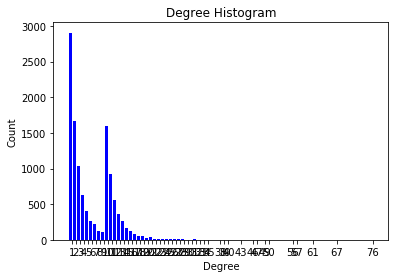

In [81]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)


plt.show()

In [31]:
for w in words_df[words_df['count'] <5]['word'].tolist():
    try:
        G.remove_node(w)
    except NetworkXError:
        print (w)

geoduck
calorie
sharing
excited
singing
covent
maitre
smoking
sized
maggiore
confused
mignon
corned
relaxing
gavroche
sophisticated
wedding
fogo
leicester
breathtake
beginning
fashioned
stove
mouthwatere
doggy
willing
dressed
fulvio
eaten
lahori
iced
tuesdays
cooking
liking
ordering
tired
pollen
britney
studios
fed
uncooke
springs
presented
waiting
delighted
memorabilia
hungarian
delious
seasoned
faye
amusingly
fashionista
quack
kite
emanate
appealing
aged
boti
appal
playing
sardegna
hammour
sauterelle
jg
janis
faint
dinning
aback
che
kettners
sevilla
scared
reform
shiro
prix
prodotti
sommeliere
condescending
sempre
chawal
freschi
tibetan
drunk
himalaya
je
rang
flaxseed
oxford
primavera
sliced
potter
mamagato
kalbi
pleasing
bustling
chi
vincent
oliver
carta
satisfying
dearer
eating
queuing
symphony
tahini
skinned
embarrassing
persevere
sevendust
macri
grudgingly
opening
merry
breading
wobbly
minced
heron
tia
accurately
coronarita
inviting
tatin
pine
nizza
horacio
disabled
shaka
shai
zu

In [32]:
G.size()

10395

In [33]:
len(G)

9056

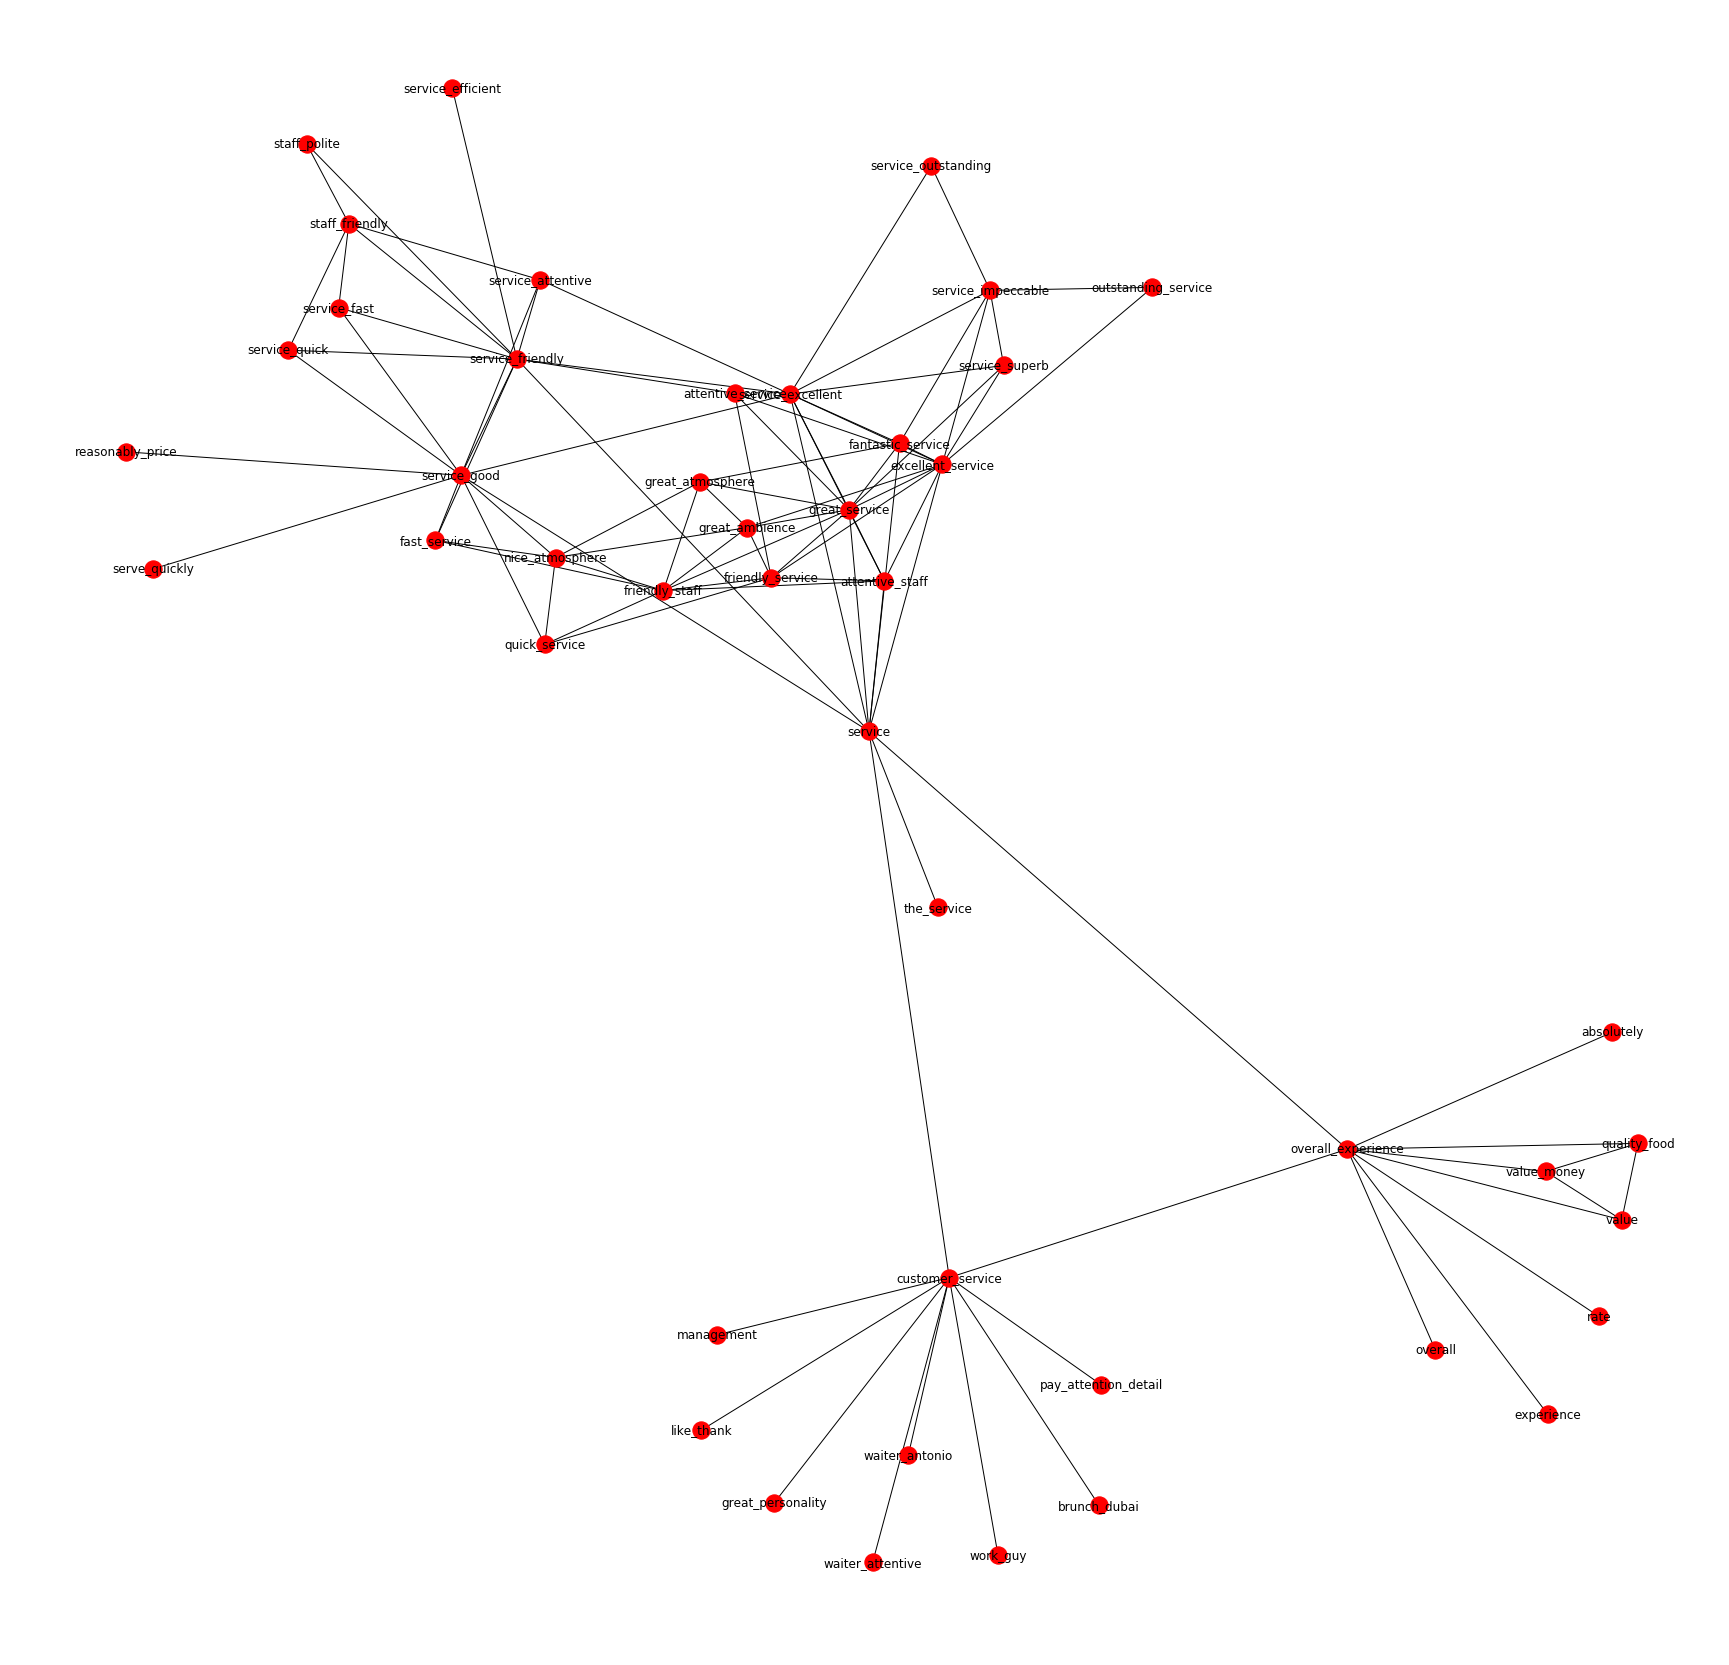

In [37]:
fig = plt.figure(figsize=(30,30))
plt.subplot(111)
sub_G4 = ego_graph(G, "service", 2, center=True, undirected=False)

nx.draw(sub_G4, with_labels=True)

#### Chinese Whispering sub_G4 = "service"

In [38]:
# Perform clustering of G
chinese_whispers(sub_G4, weighting='top', seed=1337) # the seed parameter can be omitted

# Print the clusters in the descending order of size
print('Cluster ID\tCluster Elements\n')
for label, cluster in sorted(aggregate_clusters(sub_G4).items(), key=lambda e: len(e[1]), reverse=True):
    print('{}\t{}\n'.format(label, cluster))

Cluster ID	Cluster Elements

22	{'service_impeccable', 'service', 'attentive_staff', 'service_outstanding', 'outstanding_service', 'attentive_service', 'great_service', 'fantastic_service', 'service_excellent', 'excellent_service', 'friendly_service', 'the_service', 'service_superb'}

29	{'service_friendly', 'service_attentive', 'staff_friendly', 'reasonably_price', 'service_good', 'service_quick', 'service_fast', 'service_efficient', 'staff_polite', 'serve_quickly'}

38	{'waiter_attentive', 'pay_attention_detail', 'brunch_dubai', 'great_personality', 'waiter_antonio', 'customer_service', 'like_thank', 'work_guy', 'management'}

39	{'quick_service', 'friendly_staff', 'fast_service', 'nice_atmosphere', 'great_atmosphere', 'great_ambience'}

43	{'absolutely', 'experience', 'rate', 'overall', 'overall_experience'}

10	{'value', 'quality_food', 'value_money'}



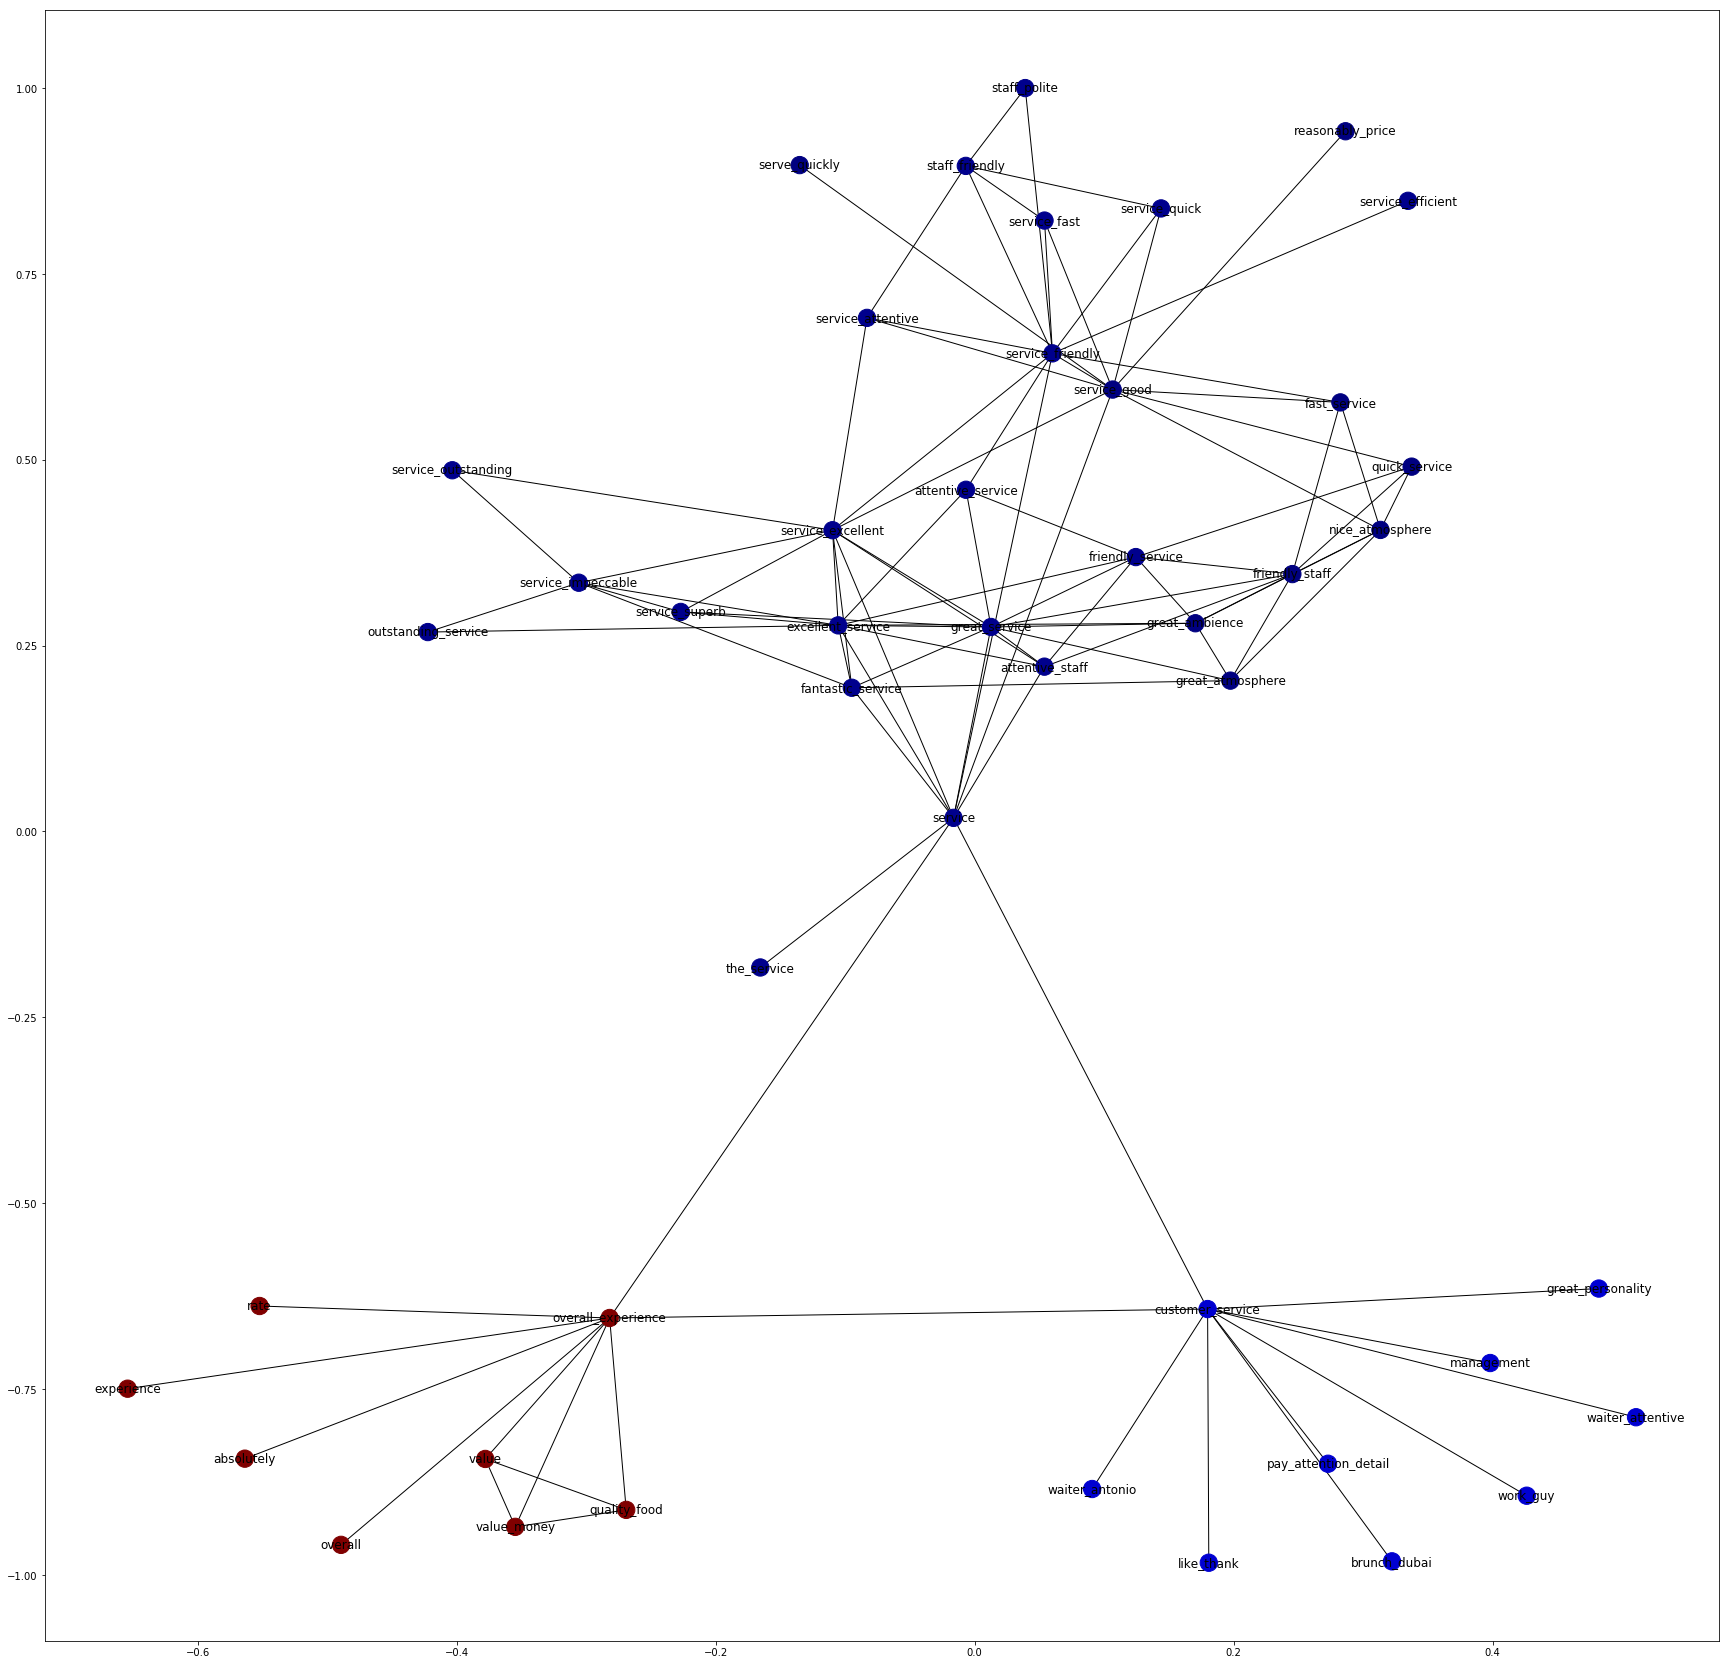

In [225]:
# Visualize the clustering of G using NetworkX (requires matplotlib)
colors = [1. / sub_G4.node[node]['label'] for node in sub_G4.nodes()]
fig = plt.figure(figsize=(30,30))
plt.subplot(111)
# fig = plt.gcf()
# fig.set_size_inches(10, 10)

nx.draw_networkx(sub_G4,cmap=plt.get_cmap('jet'), node_color=colors, font_color='black')

plt.show()

#### Markovian Clustering sub_G4 = "service"

In [42]:
import markov_clustering as mc
nodelist = list(sub_G4)
        
len(nodelist)

46

In [43]:
# then get the adjacency matrix (in sparse form)
matrix = nx.to_scipy_sparse_matrix(sub_G4)
print(matrix)

  (0, 6)	0.8644486665725708
  (0, 11)	0.9004796147346497
  (0, 15)	0.8607801198959351
  (0, 20)	0.7976534962654114
  (0, 21)	0.7940349578857422
  (0, 27)	0.8949900269508362
  (1, 8)	0.7830618619918823
  (1, 17)	0.790717601776123
  (1, 19)	0.8079714775085449
  (1, 20)	0.7849909067153931
  (1, 25)	0.808530330657959
  (1, 26)	0.625880241394043
  (1, 28)	0.8754071593284607
  (1, 31)	0.7861026525497437
  (1, 33)	0.8369549512863159
  (1, 34)	0.8160067796707153
  (1, 39)	0.7620958089828491
  (2, 37)	0.6423067450523376
  (3, 37)	0.6238183975219727
  (4, 37)	0.6209648847579956
  (5, 44)	0.5232546329498291
  (6, 0)	0.8644486665725708
  (6, 20)	0.7791274785995483
  (6, 21)	0.8623987436294556
  (6, 26)	0.5805567502975464
  :	:
  (39, 28)	0.7432876825332642
  (39, 33)	0.7650031447410583
  (39, 34)	0.7395789623260498
  (40, 37)	0.645176887512207
  (41, 44)	0.6423702239990234
  (42, 9)	0.8345769047737122
  (42, 35)	0.7841702103614807
  (42, 44)	0.787365198135376
  (43, 10)	0.8562484979629517
  (43, 1

In [44]:
result = mc.run_mcl(matrix)           # run MCL with default parameters
clusters = mc.get_clusters(result)    # get clusters

In [45]:
clusters

[(0, 6, 10, 11, 12, 15, 17, 18, 20, 21, 22, 24, 26, 27, 29, 30, 38, 43),
 (1, 8, 19, 25, 28, 31, 32, 33, 34, 39, 45),
 (2, 3, 4, 13, 14, 23, 36, 37, 40),
 (5, 7, 9, 16, 35, 41, 42, 44)]

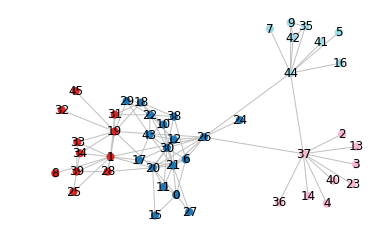

In [46]:
mc.draw_graph(matrix, clusters, node_size=50, with_labels=True, edge_color="silver")

In [50]:
clusters_list_of_lists = [list(elem) for elem in clusters]
row_no = list(range(len(nodelist)))
dictionary = dict(zip(row_no, nodelist))

{0: 'service_impeccable',
 1: 'service_friendly',
 2: 'pay_attention_detail',
 3: 'brunch_dubai',
 4: 'waiter_attentive',
 5: 'experience',
 6: 'fantastic_service',
 7: 'overall',
 8: 'service_efficient',
 9: 'value',
 10: 'great_ambience',
 11: 'service_superb',
 12: 'attentive_staff',
 13: 'great_personality',
 14: 'waiter_antonio',
 15: 'service_outstanding',
 16: 'absolutely',
 17: 'attentive_service',
 18: 'nice_atmosphere',
 19: 'service_good',
 20: 'service_excellent',
 21: 'excellent_service',
 22: 'friendly_staff',
 23: 'management',
 24: 'the_service',
 25: 'staff_polite',
 26: 'service',
 27: 'outstanding_service',
 28: 'service_attentive',
 29: 'quick_service',
 30: 'great_service',
 31: 'fast_service',
 32: 'reasonably_price',
 33: 'service_quick',
 34: 'service_fast',
 35: 'quality_food',
 36: 'work_guy',
 37: 'customer_service',
 38: 'great_atmosphere',
 39: 'staff_friendly',
 40: 'like_thank',
 41: 'rate',
 42: 'value_money',
 43: 'friendly_service',
 44: 'overall_exper

In [51]:
def replace_all(word_list, dictionary):
   for i, j in dictionary.items():
      for lst in word_list: 
         if i in set(lst): 
            lst[lst.index(i)] = j

replace_all(clusters_list_of_lists, dictionary) 

# source: https://codereview.stackexchange.com/questions/79891/iterate-over-large-list-of-lists-and-replace-its-elements

In [52]:
clusters_labelled = [tuple(l) for l in clusters_list_of_lists]
clusters_labelled

[('service_impeccable',
  'fantastic_service',
  'great_ambience',
  'service_superb',
  'attentive_staff',
  'service_outstanding',
  'attentive_service',
  'nice_atmosphere',
  'service_excellent',
  'excellent_service',
  'friendly_staff',
  'the_service',
  'service',
  'outstanding_service',
  'quick_service',
  'great_service',
  'great_atmosphere',
  'friendly_service'),
 ('service_friendly',
  'service_efficient',
  'service_good',
  'staff_polite',
  'service_attentive',
  'fast_service',
  'reasonably_price',
  'service_quick',
  'service_fast',
  'staff_friendly',
  'serve_quickly'),
 ('pay_attention_detail',
  'brunch_dubai',
  'waiter_attentive',
  'great_personality',
  'waiter_antonio',
  'management',
  'work_guy',
  'customer_service',
  'like_thank'),
 ('experience',
  'overall',
  'value',
  'absolutely',
  'quality_food',
  'rate',
  'value_money',
  'overall_experience')]

#### Choosing hyper parameter for sub_G4

In [54]:
# perform clustering using different inflation values
# for each clustering run, calculate the modularity
for inflation in [i / 10 for i in range(15, 40)]:
    result = mc.run_mcl(matrix, inflation=inflation)
    clusters = mc.get_clusters(result)
    Q = mc.modularity(matrix=result, clusters=clusters)
    print("inflation:", inflation, "modularity:", Q)

inflation: 1.5 modularity: 0.4905482041587902
inflation: 1.6 modularity: 0.655954631379962
inflation: 1.7 modularity: 0.655954631379962
inflation: 1.8 modularity: 0.655954631379962
inflation: 1.9 modularity: 0.655954631379962
inflation: 2.0 modularity: 0.655954631379962
inflation: 2.1 modularity: 0.655954631379962
inflation: 2.2 modularity: 0.6956521739130432
inflation: 2.3 modularity: 0.6984877126654064
inflation: 2.4 modularity: 0.683364839319471
inflation: 2.5 modularity: 0.683364839319471
inflation: 2.6 modularity: 0.68241965973535
inflation: 2.7 modularity: 0.68241965973535
inflation: 2.8 modularity: 0.68241965973535
inflation: 2.9 modularity: 0.6701323251417772
inflation: 3.0 modularity: 0.6474480151228734
inflation: 3.1 modularity: 0.6313799621928168
inflation: 3.2 modularity: 0.6313799621928168
inflation: 3.3 modularity: 0.5689981096408318
inflation: 3.4 modularity: 0.5340264650283555
inflation: 3.5 modularity: 0.49716446124763697
inflation: 3.6 modularity: 0.4773156899810963
i

In [ ]:
# inflation: 2.8 modularity: 0.68241965973535

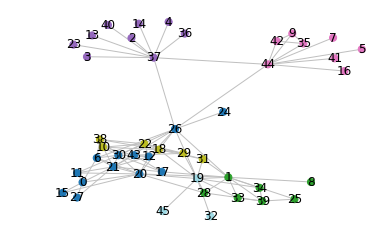

In [61]:
# cluster using the optimized cluster inflation value
result = mc.run_mcl(matrix, inflation=2.3)
clusters = mc.get_clusters(result)
mc.draw_graph(matrix, clusters, node_size=50, with_labels=True, edge_color="silver")

In [62]:
clusters_list_of_lists = [list(elem) for elem in clusters]
row_no = list(range(len(nodelist)))
dictionary = dict(zip(row_no, nodelist))
def replace_all(word_list, dictionary):
   for i, j in dictionary.items():
      for lst in word_list: 
         if i in set(lst): 
            lst[lst.index(i)] = j

replace_all(clusters_list_of_lists, dictionary) 

# source: https://codereview.stackexchange.com/questions/79891/iterate-over-large-list-of-lists-and-replace-its-elements

clusters_labelled = [tuple(l) for l in clusters_list_of_lists]
clusters_labelled

[('service_impeccable',
  'fantastic_service',
  'service_superb',
  'attentive_staff',
  'service_outstanding',
  'attentive_service',
  'service_excellent',
  'excellent_service',
  'the_service',
  'service',
  'outstanding_service',
  'great_service',
  'friendly_service'),
 ('service_friendly',
  'service_efficient',
  'staff_polite',
  'service_attentive',
  'service_quick',
  'service_fast',
  'staff_friendly'),
 ('pay_attention_detail',
  'brunch_dubai',
  'waiter_attentive',
  'great_personality',
  'waiter_antonio',
  'management',
  'work_guy',
  'customer_service',
  'like_thank'),
 ('experience',
  'overall',
  'value',
  'absolutely',
  'quality_food',
  'rate',
  'value_money',
  'overall_experience'),
 ('great_ambience',
  'nice_atmosphere',
  'friendly_staff',
  'quick_service',
  'fast_service',
  'great_atmosphere'),
 ('service_good', 'reasonably_price', 'serve_quickly')]

#### sub_G5

In [63]:
# Generate connected components and select the largest:
largest_component = max(nx.connected_components(G), key=len)

# Create a subgraph of G consisting only of this component:
G2 = G.subgraph(largest_component)

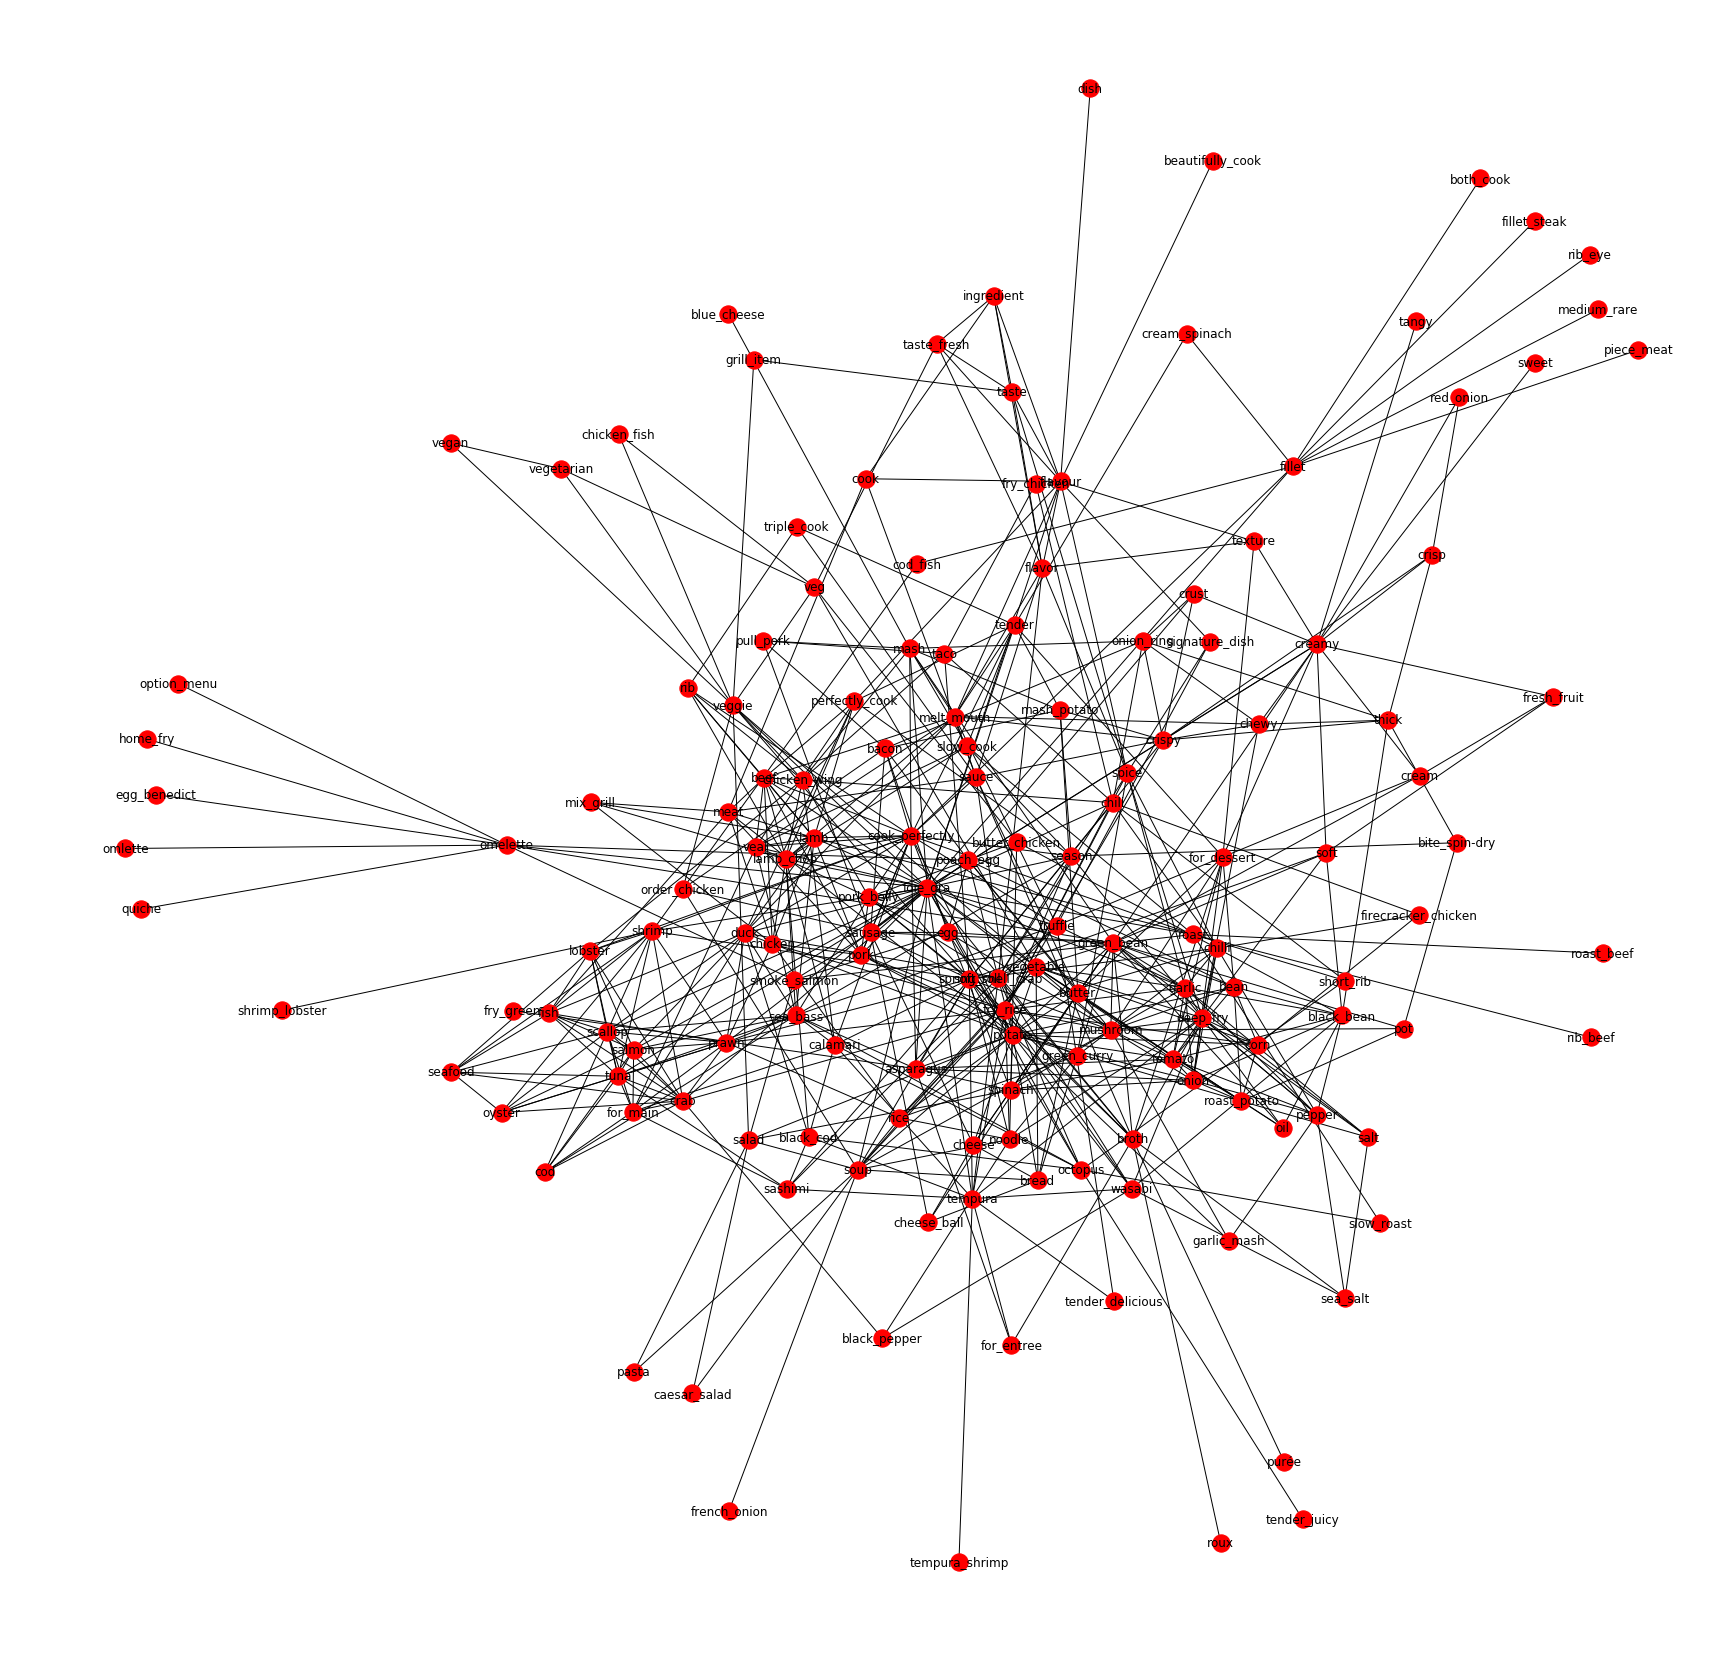

In [64]:
fig = plt.figure(figsize=(30,30))
plt.subplot(111)
sub_G5 = ego_graph(G2, "foie_gra", 2, center=True, undirected=False)

nx.draw(sub_G5, with_labels=True)

In [65]:
import markov_clustering as mc
nodelist = list(sub_G5)
        
len(nodelist)

153

In [66]:
# then get the adjacency matrix (in sparse form)
matrix = nx.to_scipy_sparse_matrix(sub_G5)
print(matrix)

  (0, 94)	0.793471097946167
  (0, 126)	0.7643002271652222
  (0, 148)	0.7581636309623718
  (1, 12)	0.8180708885192871
  (1, 13)	0.8269346952438354
  (1, 15)	0.8555864095687866
  (1, 22)	0.8177108764648438
  (1, 29)	0.864410400390625
  (1, 49)	0.8289264440536499
  (1, 50)	0.8026498556137085
  (1, 55)	0.7992621064186096
  (1, 56)	0.7015084028244019
  (1, 59)	0.8153029084205627
  (1, 62)	0.8564469814300537
  (1, 63)	0.8188982605934143
  (1, 65)	0.777869462966919
  (1, 75)	0.8320320248603821
  (1, 83)	0.8688032627105713
  (1, 93)	0.8156371116638184
  (1, 94)	0.8280459642410278
  (1, 95)	0.7768846154212952
  (1, 96)	0.8429073095321655
  (1, 102)	0.7067010402679443
  (1, 104)	0.795691728591919
  (1, 107)	0.8693980574607849
  :	:
  (150, 39)	0.8061245679855347
  (150, 57)	0.8067144155502319
  (150, 62)	0.8205639123916626
  (150, 83)	0.8143189549446106
  (150, 89)	0.7363548874855042
  (150, 107)	0.8350869417190552
  (150, 147)	0.8340446949005127
  (151, 9)	0.7587630748748779
  (151, 12)	0.83646

In [67]:
result = mc.run_mcl(matrix)           # run MCL with default parameters
clusters = mc.get_clusters(result)    # get clusters

In [68]:
clusters

[(0, 3, 10, 35, 61, 67, 86, 88, 123, 126, 148),
 (1,
  5,
  7,
  9,
  13,
  18,
  29,
  33,
  59,
  60,
  73,
  78,
  85,
  87,
  90,
  106,
  113,
  114,
  128,
  134,
  135,
  141,
  149),
 (2, 28, 50, 70, 89, 136),
 (4, 22, 44, 47, 53, 71, 82, 100),
 (6, 40, 75, 76, 109, 145),
 (8,
  15,
  19,
  26,
  39,
  45,
  48,
  58,
  62,
  81,
  83,
  84,
  101,
  103,
  115,
  131,
  132,
  147,
  150,
  152),
 (11, 64, 74, 102, 110, 112),
 (12, 24, 32, 34, 63, 80, 93, 96, 105, 130, 139, 146, 151),
 (14, 111),
 (16, 27, 108, 143),
 (17, 23, 25, 51, 68, 95, 127),
 (20,),
 (21, 30, 98, 99, 118, 121, 133, 138),
 (31, 119),
 (36,),
 (37, 57),
 (38, 56),
 (41, 124),
 (42, 43, 46, 49, 52, 54, 66, 92, 97, 125, 129, 137, 142, 144),
 (55,),
 (65, 69, 79, 120, 122),
 (72, 107),
 (77, 104, 117, 140),
 (91, 116),
 (94,)]

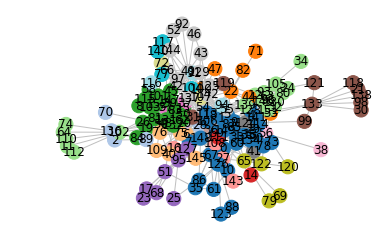

In [69]:
mc.draw_graph(matrix, clusters, node_size=200, with_labels=True, edge_color="silver")

In [70]:
row_no = list(range(len(nodelist)))
dictionary = dict(zip(row_no, nodelist))
dictionary

{0: 'signature_dish',
 1: 'foie_gra',
 2: 'caesar_salad',
 3: 'texture',
 4: 'calamari',
 5: 'soft_shell_crab',
 6: 'bacon',
 7: 'green_curry',
 8: 'garlic_mash',
 9: 'cook_perfectly',
 10: 'cook',
 11: 'omlette',
 12: 'crab',
 13: 'lamb',
 14: 'blue_cheese',
 15: 'garlic',
 16: 'firecracker_chicken',
 17: 'vegetarian',
 18: 'spring_roll',
 19: 'cheese',
 20: 'chilli',
 21: 'rib_eye',
 22: 'tempura',
 23: 'vegan',
 24: 'seafood',
 25: 'grill_item',
 26: 'bread',
 27: 'taco',
 28: 'rice',
 29: 'lamb_chop',
 30: 'fillet_steak',
 31: 'noodle',
 32: 'fish',
 33: 'meat',
 34: 'shrimp_lobster',
 35: 'taste_fresh',
 36: 'sauce',
 37: 'deep_fry',
 38: 'tender_juicy',
 39: 'onion',
 40: 'smoke_salmon',
 41: 'triple_cook',
 42: 'crust',
 43: 'crisp',
 44: 'sashimi',
 45: 'black_bean',
 46: 'red_onion',
 47: 'for_entree',
 48: 'corn',
 49: 'creamy',
 50: 'soup',
 51: 'veg',
 52: 'tangy',
 53: 'black_cod',
 54: 'onion_ring',
 55: 'season',
 56: 'octopus',
 57: 'green_bean',
 58: 'salt',
 59: 'pork

In [71]:
clusters_list_of_lists = [list(elem) for elem in clusters]

In [72]:
def replace_all(word_list, dictionary):
   for i, j in dictionary.items():
      for lst in word_list: 
         if i in set(lst): 
            lst[lst.index(i)] = j

replace_all(clusters_list_of_lists, dictionary) 

# source: https://codereview.stackexchange.com/questions/79891/iterate-over-large-list-of-lists-and-replace-its-elements

In [73]:
clusters_labelled = [tuple(l) for l in clusters_list_of_lists]
clusters_labelled

[('signature_dish',
  'texture',
  'cook',
  'taste_fresh',
  'ingredient',
  'flavor',
  'taste',
  'beautifully_cook',
  'dish',
  'flavour',
  'spice'),
 ('foie_gra',
  'soft_shell_crab',
  'green_curry',
  'cook_perfectly',
  'lamb',
  'spring_roll',
  'lamb_chop',
  'meat',
  'pork',
  'chicken_wing',
  'mix_grill',
  'rib',
  'chicken',
  'melt_mouth',
  'slow_cook',
  'mash_potato',
  'fry_rice',
  'veal',
  'sea_bass',
  'perfectly_cook',
  'beef',
  'duck',
  'pork_belly'),
 ('caesar_salad', 'rice', 'soup', 'french_onion', 'salad', 'pasta'),
 ('calamari',
  'tempura',
  'sashimi',
  'for_entree',
  'black_cod',
  'tempura_shrimp',
  'tender_delicious',
  'wasabi'),
 ('bacon', 'smoke_salmon', 'sausage', 'egg', 'order_chicken', 'pull_pork'),
 ('garlic_mash',
  'garlic',
  'cheese',
  'bread',
  'onion',
  'black_bean',
  'corn',
  'salt',
  'potato',
  'poach_egg',
  'mushroom',
  'cheese_ball',
  'pepper',
  'roast_potato',
  'oil',
  'butter',
  'vegetable',
  'tomato',
  'spi

In [74]:
# Perform clustering of G
chinese_whispers(sub_G5, weighting='top', seed=1337) # the seed parameter can be omitted

# Print the clusters in the descending order of size
print('Cluster ID\tCluster Elements\n')
for label, cluster in sorted(aggregate_clusters(sub_G5).items(), key=lambda e: len(e[1]), reverse=True):
    print('{}\t{}\n'.format(label, cluster))

Cluster ID	Cluster Elements

108	{'mushroom', 'cheese_ball', 'black_bean', 'for_entree', 'corn', 'soup', 'salad', 'caesar_salad', 'butter_chicken', 'bacon', 'green_curry', 'garlic_mash', 'soft', 'green_bean', 'salt', 'butter', 'wasabi', 'pepper', 'vegetable', 'garlic', 'potato', 'firecracker_chicken', 'spring_roll', 'cheese', 'chilli', 'roast_potato', 'broth', 'pasta', 'for_dessert', 'bread', 'taco', 'rice', 'asparagus', 'chili', 'purée', 'fry_chicken', 'pull_pork', 'noodle', 'order_chicken', 'tomato', 'spice', 'french_onion', 'fry_rice', 'fry_green', 'deep_fry', 'oil', 'pot', 'onion', 'roux', 'sausage', 'egg', 'smoke_salmon', 'sea_salt', 'black_pepper', 'spinach', 'poach_egg', 'bean'}

30	{'signature_dish', 'foie_gra', 'sashimi', 'short_rib', 'chicken', 'melt_mouth', 'tender', 'slow_cook', 'black_cod', 'calamari', 'truffle', 'soft_shell_crab', 'season', 'octopus', 'sea_bass', 'cook_perfectly', 'cook', 'pork', 'chicken_wing', 'lamb', 'blue_cheese', 'perfectly_cook', 'beef', 'tempura', 

#### Choosing hyper parameter for sub_G5

In [82]:
# perform clustering using different inflation values
# for each clustering run, calculate the modularity
for inflation in [i / 10 for i in range(11, 40)]:
    result = mc.run_mcl(matrix, inflation=inflation)
    clusters = mc.get_clusters(result)
    Q = mc.modularity(matrix=result, clusters=clusters)
    print("inflation:", inflation, "modularity:", Q)

inflation: 1.1 modularity: 0.0
inflation: 1.2 modularity: 0.0
inflation: 1.3 modularity: 0.10419069588619749
inflation: 1.4 modularity: 0.6635054893417067
inflation: 1.5 modularity: 0.760134990815499
inflation: 1.6 modularity: 0.7837156649152038
inflation: 1.7 modularity: 0.7999487376650011
inflation: 1.8 modularity: 0.8014866077149816
inflation: 1.9 modularity: 0.7983681490025202
inflation: 2.0 modularity: 0.7667136571404153
inflation: 2.1 modularity: 0.7680806527403978
inflation: 2.2 modularity: 0.7653039429279318
inflation: 2.3 modularity: 0.754709727028065
inflation: 2.4 modularity: 0.7343756674783194
inflation: 2.5 modularity: 0.7238668888034512
inflation: 2.6 modularity: 0.7009697125037371
inflation: 2.7 modularity: 0.6833269255414581
inflation: 2.8 modularity: 0.6613695587167324
inflation: 2.9 modularity: 0.6394121918920072
inflation: 3.0 modularity: 0.6212567815797341
inflation: 3.1 modularity: 0.608697509504891
inflation: 3.2 modularity: 0.5834935281302062
inflation: 3.3 modul

In [76]:
# inflation: 1.8 modularity: 0.8014866077149816

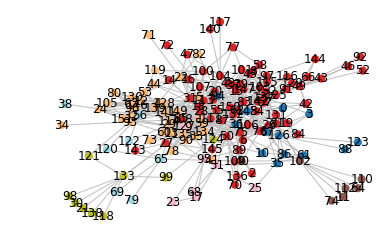

In [83]:
# cluster using the optimized cluster inflation value
result = mc.run_mcl(matrix, inflation=1.4)
clusters = mc.get_clusters(result)
mc.draw_graph(matrix, clusters, node_size=50, with_labels=True, edge_color="silver")

In [84]:
clusters_list_of_lists = [list(elem) for elem in clusters]
row_no = list(range(len(nodelist)))
dictionary = dict(zip(row_no, nodelist))
def replace_all(word_list, dictionary):
   for i, j in dictionary.items():
      for lst in word_list: 
         if i in set(lst): 
            lst[lst.index(i)] = j

replace_all(clusters_list_of_lists, dictionary) 

# source: https://codereview.stackexchange.com/questions/79891/iterate-over-large-list-of-lists-and-replace-its-elements

clusters_labelled = [tuple(l) for l in clusters_list_of_lists]
clusters_labelled

[('signature_dish',
  'texture',
  'cook',
  'taste_fresh',
  'sauce',
  'ingredient',
  'flavor',
  'taste',
  'beautifully_cook',
  'truffle',
  'dish',
  'flavour',
  'spice'),
 ('foie_gra',
  'calamari',
  'soft_shell_crab',
  'cook_perfectly',
  'crab',
  'lamb',
  'tempura',
  'seafood',
  'lamb_chop',
  'fish',
  'meat',
  'shrimp_lobster',
  'triple_cook',
  'sashimi',
  'black_cod',
  'pork',
  'chicken_wing',
  'tuna',
  'tempura_shrimp',
  'mix_grill',
  'rib',
  'cod',
  'tender_delicious',
  'chicken',
  'slow_cook',
  'shrimp',
  'scallop',
  'oyster',
  'veal',
  'black_pepper',
  'sea_bass',
  'for_main',
  'perfectly_cook',
  'beef',
  'prawn',
  'duck',
  'salmon',
  'pork_belly',
  'lobster'),
 ('caesar_salad',
  'bacon',
  'green_curry',
  'garlic_mash',
  'blue_cheese',
  'garlic',
  'firecracker_chicken',
  'spring_roll',
  'cheese',
  'chilli',
  'bread',
  'taco',
  'rice',
  'noodle',
  'deep_fry',
  'onion',
  'crust',
  'crisp',
  'black_bean',
  'red_onion',

#### sub_G2

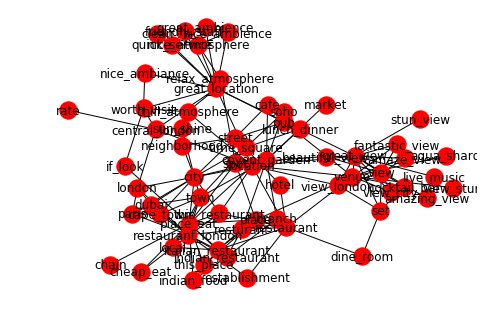

In [85]:
sub_G2 = ego_graph(G, "location", 2, center=True, undirected=False)

nx.draw(sub_G2, with_labels=True)

In [86]:
import markov_clustering as mc
nodelist = list(sub_G2)
        
len(nodelist)

64

In [87]:
# then get the adjacency matrix (in sparse form)
matrix = nx.to_scipy_sparse_matrix(sub_G2)
print(matrix)

  (0, 48)	0.7062208652496338
  (1, 4)	0.7933594584465027
  (1, 12)	0.6568979024887085
  (1, 21)	0.6232380270957947
  (1, 23)	0.7836647033691406
  (2, 11)	0.7245208024978638
  (2, 58)	0.5635528564453125
  (3, 30)	0.6399065256118774
  (3, 54)	0.6265298128128052
  (3, 55)	0.829666018486023
  (4, 1)	0.7933594584465027
  (4, 45)	0.8038805723190308
  (4, 48)	0.7335582971572876
  (4, 60)	0.7237046957015991
  (5, 9)	0.6391226053237915
  (5, 30)	0.544299304485321
  (5, 38)	0.5447649955749512
  (5, 46)	0.5474010705947876
  (5, 58)	0.5773894786834717
  (5, 62)	0.6448608636856079
  (6, 25)	0.761631965637207
  (6, 48)	0.6900380253791809
  (7, 19)	0.859581470489502
  (7, 26)	0.781548023223877
  (7, 61)	0.8303639888763428
  :	:
  (60, 4)	0.7237046957015991
  (60, 9)	0.7302762866020203
  (60, 10)	0.7216700315475464
  (60, 13)	0.6311503648757935
  (60, 23)	0.7020165920257568
  (60, 28)	0.6751357913017273
  (60, 48)	0.7835686206817627
  (60, 53)	0.7456755638122559
  (61, 7)	0.8303639888763428
  (61, 8)	

In [88]:
result = mc.run_mcl(matrix)           # run MCL with default parameters
clusters = mc.get_clusters(result)    # get clusters

In [89]:
clusters

[(0, 6, 10, 17, 28, 48, 53, 56, 60),
 (1, 4, 12, 18, 21, 23, 40, 45),
 (2, 3, 11, 14, 22, 27, 30, 32, 41, 42, 44, 47, 52, 54, 55, 63),
 (5, 9, 13, 15, 16, 31, 34, 36, 38, 46, 51, 62),
 (7, 8, 19, 20, 24, 26, 29, 35, 37, 39, 43, 50, 57, 59, 61),
 (25, 33),
 (49, 58)]

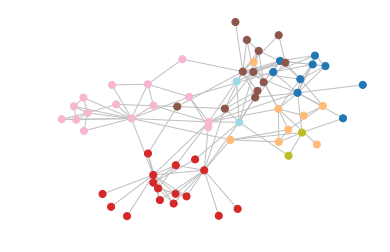

In [90]:
mc.draw_graph(matrix, clusters, node_size=50, with_labels=False, edge_color="silver")

In [91]:
row_no = list(range(len(nodelist)))
dictionary = dict(zip(row_no, nodelist))
dictionary

{0: 'sun_shine',
 1: 'soho',
 2: 'dine_room',
 3: 'fantastic_view',
 4: 'time_square',
 5: 'place',
 6: 'neighborhood',
 7: 'great_ambience',
 8: 'location',
 9: 'place_eat',
 10: 'restaurant_london',
 11: 'set',
 12: 'cafe',
 13: 'local',
 14: 'amaze_view',
 15: 'this_restaurant',
 16: 'chain',
 17: 'london',
 18: 'market',
 19: 'nice_atmosphere',
 20: 'worth_visit',
 21: 'pub',
 22: 'beautiful_view',
 23: 'covent_garden',
 24: 'if_look',
 25: 'street',
 26: 'friendly_staff',
 27: 'view_london',
 28: 'dubai',
 29: 'clean',
 30: 'venue',
 31: 'indian_food',
 32: 'aqua_shard',
 33: 'hotel',
 34: 'resturant',
 35: 'quick_service',
 36: 'cheap_eat',
 37: 'nice_ambiance',
 38: 'italian_restaurant',
 39: 'nice_ambience',
 40: 'branch',
 41: 'cocktail_bar',
 42: 'stun_view',
 43: 'relax_atmosphere',
 44: 'live_music',
 45: 'lunch_dinner',
 46: 'spot',
 47: 'view_stun',
 48: 'city',
 49: 'establishment',
 50: 'chill_atmosphere',
 51: 'indian_restaurant',
 52: 'view_city',
 53: 'cape_town',
 5

In [92]:
clusters_list_of_lists = [list(elem) for elem in clusters]

In [93]:
def replace_all(word_list, dictionary):
   for i, j in dictionary.items():
      for lst in word_list: 
         if i in set(lst): 
            lst[lst.index(i)] = j

replace_all(clusters_list_of_lists, dictionary) 

# source: https://codereview.stackexchange.com/questions/79891/iterate-over-large-list-of-lists-and-replace-its-elements

In [94]:
clusters_labelled = [tuple(l) for l in clusters_list_of_lists]
clusters_labelled

[('sun_shine',
  'neighborhood',
  'restaurant_london',
  'london',
  'dubai',
  'city',
  'cape_town',
  'paris',
  'town'),
 ('soho',
  'time_square',
  'cafe',
  'market',
  'pub',
  'covent_garden',
  'branch',
  'lunch_dinner'),
 ('dine_room',
  'fantastic_view',
  'set',
  'amaze_view',
  'beautiful_view',
  'view_london',
  'venue',
  'aqua_shard',
  'cocktail_bar',
  'stun_view',
  'live_music',
  'view_stun',
  'view_city',
  'view',
  'great_view',
  'amazing_view'),
 ('place',
  'place_eat',
  'local',
  'this_restaurant',
  'chain',
  'indian_food',
  'resturant',
  'cheap_eat',
  'italian_restaurant',
  'spot',
  'indian_restaurant',
  'this_place'),
 ('great_ambience',
  'location',
  'nice_atmosphere',
  'worth_visit',
  'if_look',
  'friendly_staff',
  'clean',
  'quick_service',
  'nice_ambiance',
  'nice_ambience',
  'relax_atmosphere',
  'chill_atmosphere',
  'central_london',
  'rate',
  'great_location'),
 ('street', 'hotel'),
 ('establishment', 'restaurant')]

#### Choosing hyper parameter for sub_G4

In [95]:
# perform clustering using different inflation values
# for each clustering run, calculate the modularity
for inflation in [i / 10 for i in range(14, 40)]:
    result = mc.run_mcl(matrix, inflation=inflation)
    clusters = mc.get_clusters(result)
    Q = mc.modularity(matrix=result, clusters=clusters)
    print("inflation:", inflation, "modularity:", Q)

inflation: 1.4 modularity: 0.591796875
inflation: 1.5 modularity: 0.591796875
inflation: 1.6 modularity: 0.65771484375
inflation: 1.7 modularity: 0.72412109375
inflation: 1.8 modularity: 0.72607421875
inflation: 1.9 modularity: 0.72705078125
inflation: 2.0 modularity: 0.71630859375
inflation: 2.1 modularity: 0.71630859375
inflation: 2.2 modularity: 0.71630859375
inflation: 2.3 modularity: 0.6982421875
inflation: 2.4 modularity: 0.7001953125
inflation: 2.5 modularity: 0.69580078125
inflation: 2.6 modularity: 0.68408203125
inflation: 2.7 modularity: 0.68408203125
inflation: 2.8 modularity: 0.67236328125
inflation: 2.9 modularity: 0.6640625
inflation: 3.0 modularity: 0.64892578125
inflation: 3.1 modularity: 0.62060546875
inflation: 3.2 modularity: 0.60693359375
inflation: 3.3 modularity: 0.58349609375
inflation: 3.4 modularity: 0.57373046875
inflation: 3.5 modularity: 0.5498046875
inflation: 3.6 modularity: 0.54931640625
inflation: 3.7 modularity: 0.53466796875
inflation: 3.8 modularity: 

In [ ]:
# inflation: 1.9 modularity: 0.72705078125

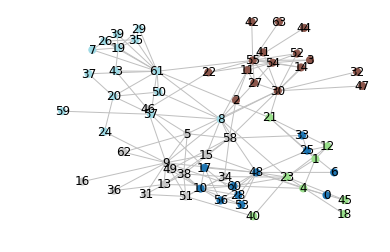

In [96]:
# cluster using the optimized cluster inflation value
result = mc.run_mcl(matrix, inflation=1.9)
clusters = mc.get_clusters(result)
mc.draw_graph(matrix, clusters, node_size=50, with_labels=True, edge_color="silver")

In [97]:
clusters_list_of_lists = [list(elem) for elem in clusters]
row_no = list(range(len(nodelist)))
dictionary = dict(zip(row_no, nodelist))
def replace_all(word_list, dictionary):
   for i, j in dictionary.items():
      for lst in word_list: 
         if i in set(lst): 
            lst[lst.index(i)] = j

replace_all(clusters_list_of_lists, dictionary) 

# source: https://codereview.stackexchange.com/questions/79891/iterate-over-large-list-of-lists-and-replace-its-elements

clusters_labelled = [tuple(l) for l in clusters_list_of_lists]
clusters_labelled

[('sun_shine',
  'neighborhood',
  'restaurant_london',
  'london',
  'street',
  'dubai',
  'hotel',
  'city',
  'cape_town',
  'paris',
  'town'),
 ('soho',
  'time_square',
  'cafe',
  'market',
  'pub',
  'covent_garden',
  'branch',
  'lunch_dinner'),
 ('dine_room',
  'fantastic_view',
  'set',
  'amaze_view',
  'beautiful_view',
  'view_london',
  'venue',
  'aqua_shard',
  'cocktail_bar',
  'stun_view',
  'live_music',
  'view_stun',
  'view_city',
  'view',
  'great_view',
  'amazing_view'),
 ('place',
  'place_eat',
  'local',
  'this_restaurant',
  'chain',
  'indian_food',
  'resturant',
  'cheap_eat',
  'italian_restaurant',
  'spot',
  'establishment',
  'indian_restaurant',
  'restaurant',
  'this_place'),
 ('great_ambience',
  'location',
  'nice_atmosphere',
  'worth_visit',
  'if_look',
  'friendly_staff',
  'clean',
  'quick_service',
  'nice_ambiance',
  'nice_ambience',
  'relax_atmosphere',
  'chill_atmosphere',
  'central_london',
  'rate',
  'great_location')]

In [98]:
# Perform clustering of G
chinese_whispers(sub_G2, weighting='top', seed=1337) # the seed parameter can be omitted

# Print the clusters in the descending order of size
print('Cluster ID\tCluster Elements\n')
for label, cluster in sorted(aggregate_clusters(sub_G2).items(), key=lambda e: len(e[1]), reverse=True):
    print('{}\t{}\n'.format(label, cluster))

Cluster ID	Cluster Elements

61	{'sun_shine', 'time_square', 'place', 'location', 'place_eat', 'restaurant_london', 'market', 'local', 'this_restaurant', 'chain', 'london', 'covent_garden', 'dubai', 'indian_food', 'resturant', 'cheap_eat', 'italian_restaurant', 'branch', 'lunch_dinner', 'spot', 'city', 'establishment', 'indian_restaurant', 'cape_town', 'paris', 'restaurant', 'town', 'soho', 'this_place'}

15	{'venue', 'aqua_shard', 'set', 'view_stun', 'amaze_view', 'dine_room', 'view_city', 'fantastic_view', 'view', 'beautiful_view', 'great_view', 'cocktail_bar', 'stun_view', 'live_music', 'view_london', 'amazing_view'}

20	{'clean', 'chill_atmosphere', 'quick_service', 'nice_ambiance', 'friendly_staff', 'nice_atmosphere', 'nice_ambience', 'worth_visit', 'central_london', 'if_look', 'rate', 'relax_atmosphere', 'great_location', 'great_ambience'}

26	{'cafe', 'hotel', 'pub', 'street', 'neighborhood'}

